# Optimize paramters passed to gap_fit with gradient descent method, but just on one data set (training or test)

## Omptimizing RMSE

In [1]:
# Importing everthing we need 
import sys
sys.path.append('../')

from GAP.gapmodels import GAPModel
from GAP.gapmodels import Split
from GAP.gapdescriptors import distance_2b
from GAP.gapplot import QualityPlot
import matplotlib.pyplot as plt
from textwrap import wrap

## fixed parameters 

In [2]:
cutoff = [3]
n_sparse = [15]
delta = [1]
sparse_method = ['UNIFORM']
covariance_type = ['ARD_SE']
sigma_fixed = ['0.0 0.0'] # sigma for hessian and virial stress is not used and hence won't be optimized

## variable parameters

In [3]:
theta = 1
sigma_energy = 1
sigma_force = 1




## Split up the Data 

In [4]:
## Import Hydrogen_MD Data and split into training and test data, use split 80%/20%
data='/Users/simon/simon_ml/tools/hydrogentuple.xyz'
train_percentage = 0.8
split = Split(data, train_percentage)

#Perform the acutal split
train_file = 'train.xyz'
test_file = 'test.xyz'
split.split(train_file, test_file)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


## Make function that is used for optimization. RMSE takes the 3 variable parameters as input and outputs and RMSE error

In [5]:
data_file = 'train.xyz'
def RMSE_train(tef):
    theta,sigma_energy,sigma_force = tef[0],tef[1],tef[2]
    data_file = 'train.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 4
    n_sparse = 20
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

    # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=False)

    # Select filename in which predictions should be stored for prediction data 
    prediction_file= f"quip_2b.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file,print_output=False)
    
    # Calculate RMSE error
    RMSE = model.energy_RMSE(data_file,prediction_file)/2 + model.force_RMSE(data_file,prediction_file)/6
    

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file, 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data"
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file, 
                        axis=axs[1],
                        title="\n".join(wrap(f"Force of Training Data"
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    # Get real and predicted energies
    #real_energies, predicted_energies = model.getEnergies('train.xyz','quip_2b.xyz')
    
    return RMSE

## Use Steepest decent method to optimize the RMSE function on training data

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.05 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.95 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8999999999999999 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.9333333333333333 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_ty

<ipython-input-5-90abcf0ad1db>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.28518518518518765 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.24650205761317134 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.10987654320987883 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.3901234567901263 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.06913580246913392 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.0016460905349774818 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.055144032921812844 spar

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07924761992058212 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07964578750453281 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07926065223530356 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.0795174090814564 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07945321986991818 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07946955798921669 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.0794597360272789 sparse_method

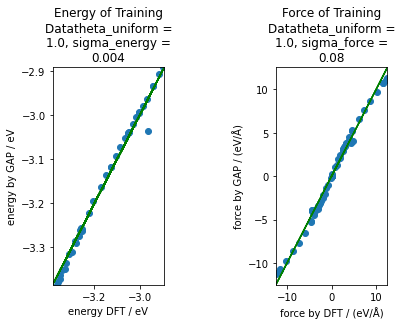

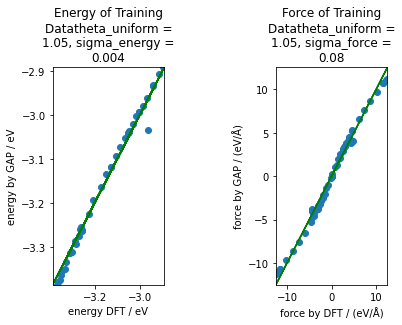

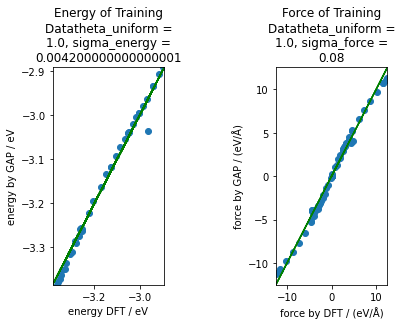

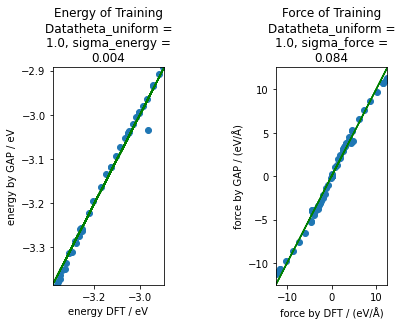

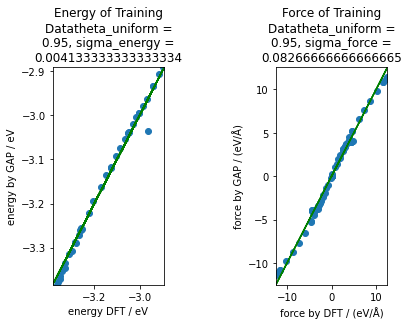

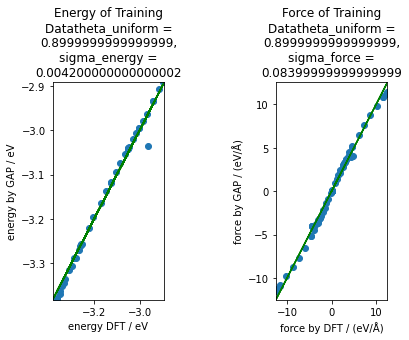

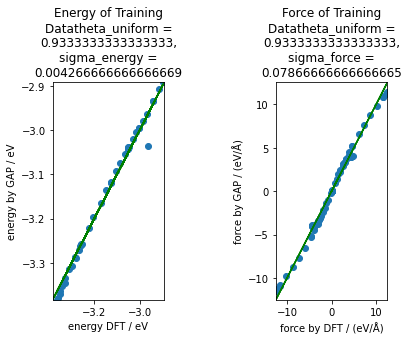

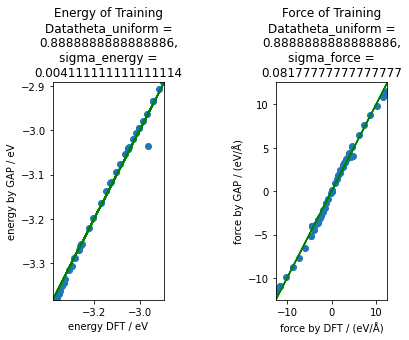

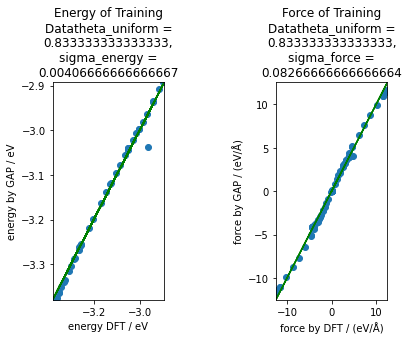

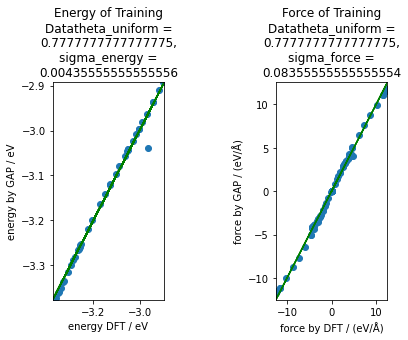

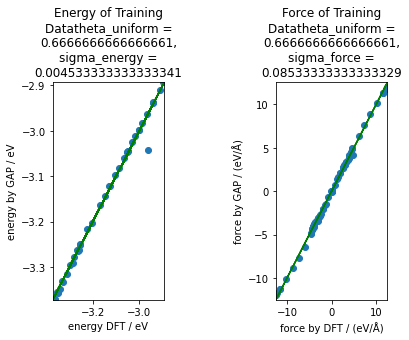

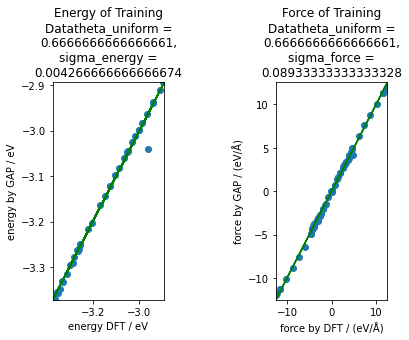

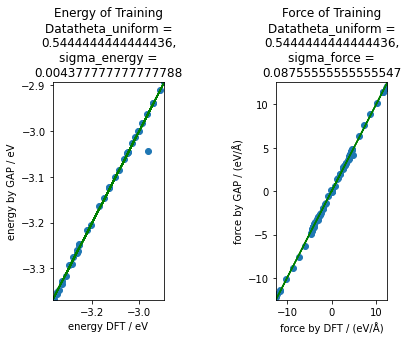

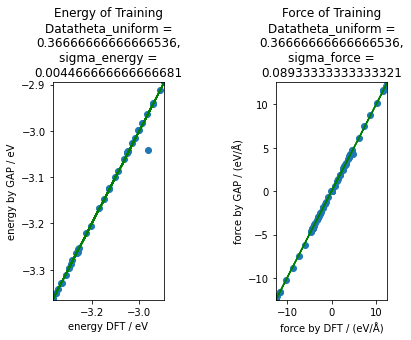

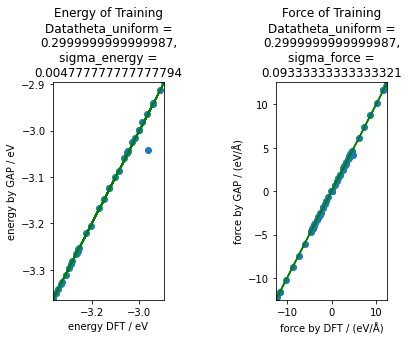

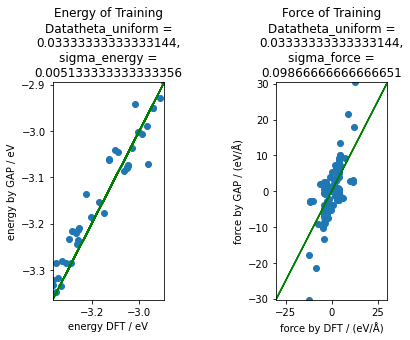

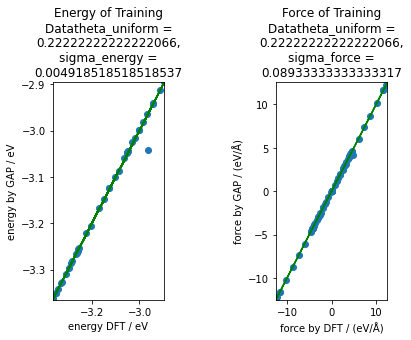

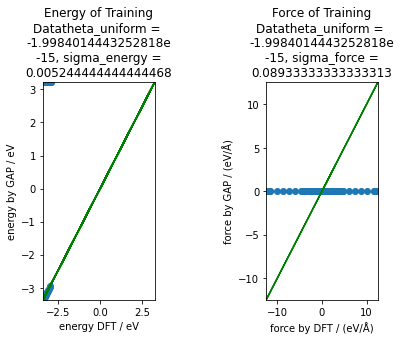

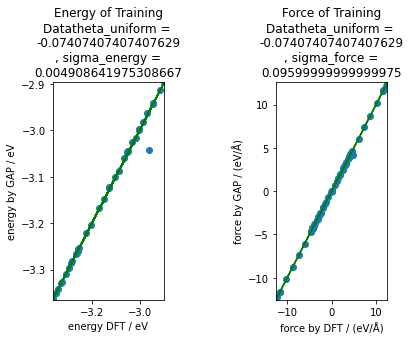

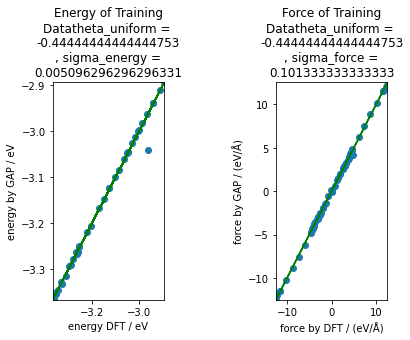

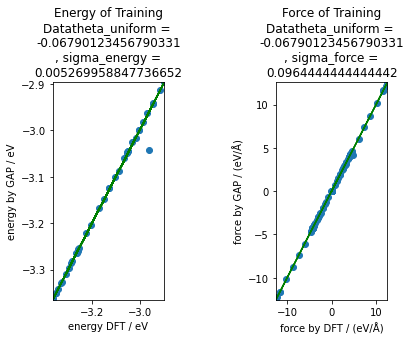

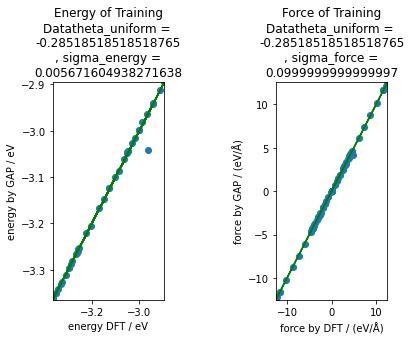

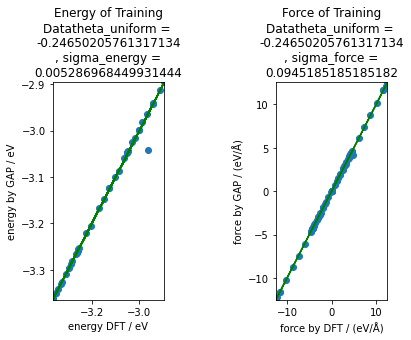

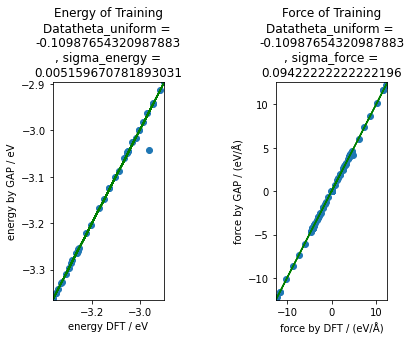

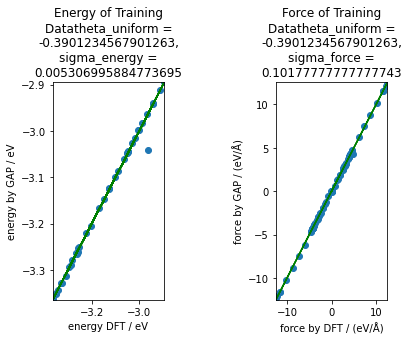

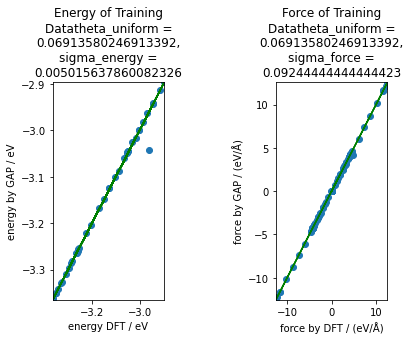

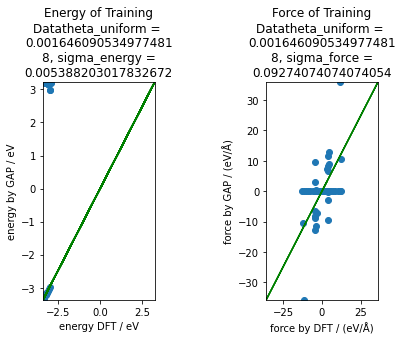

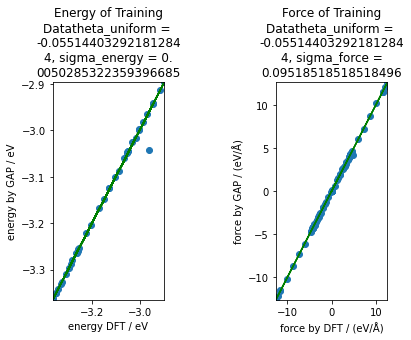

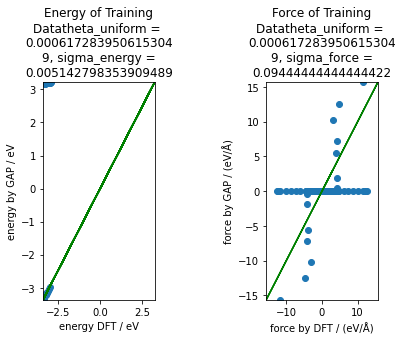

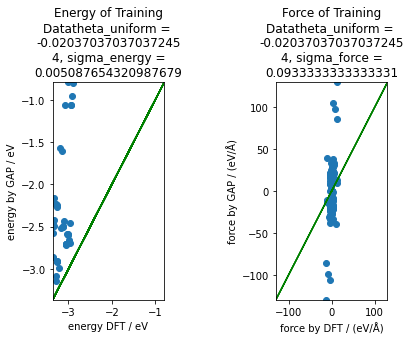

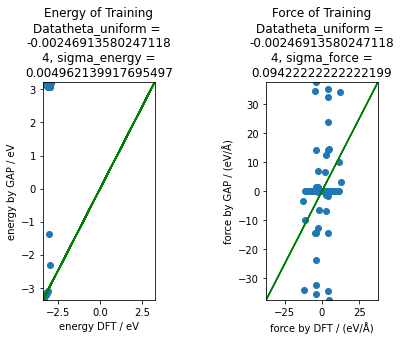

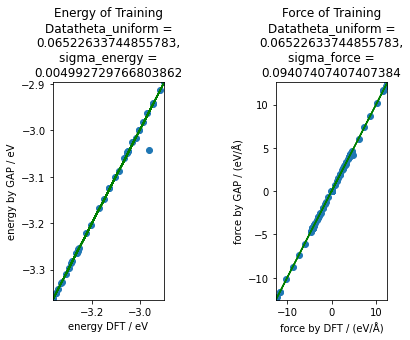

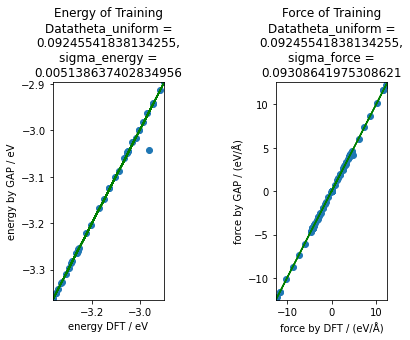

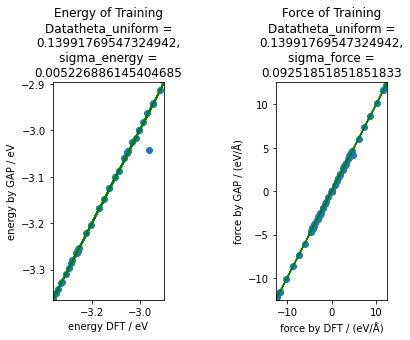

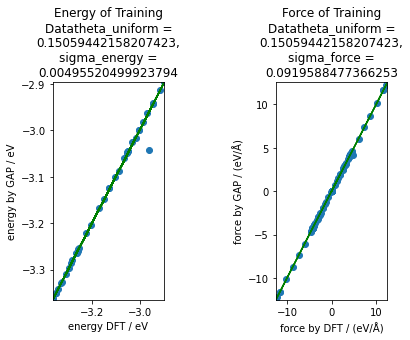

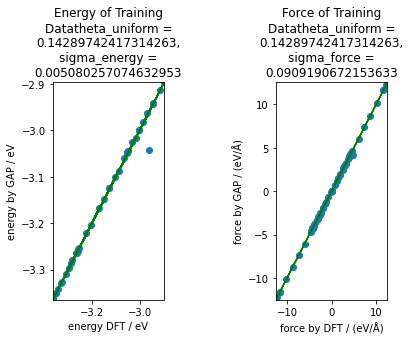

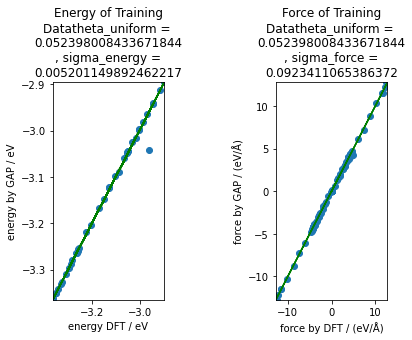

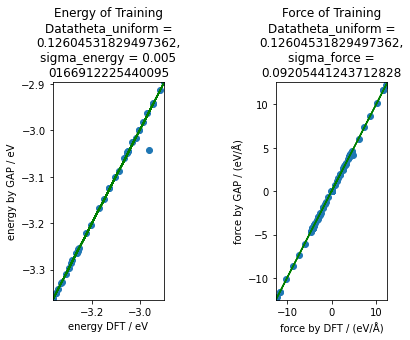

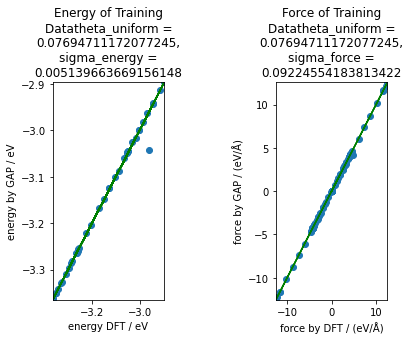

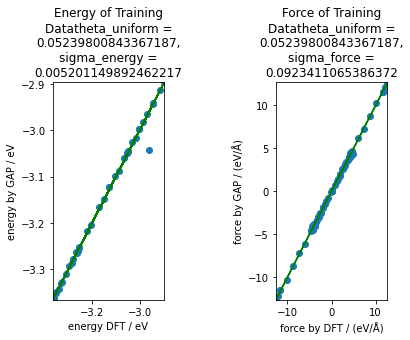

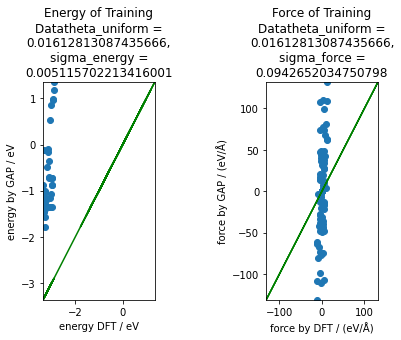

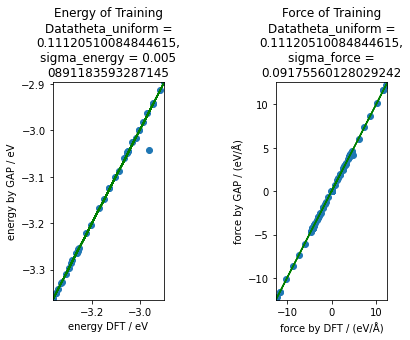

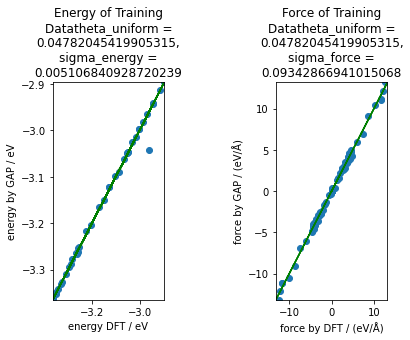

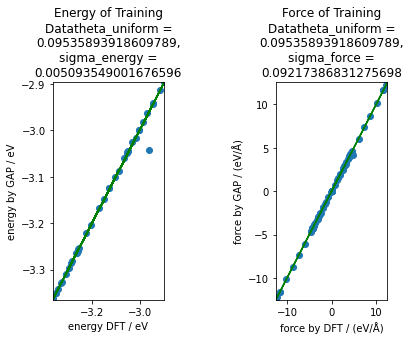

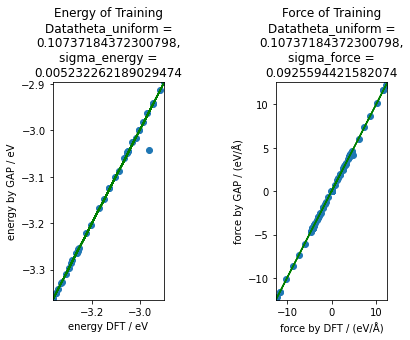

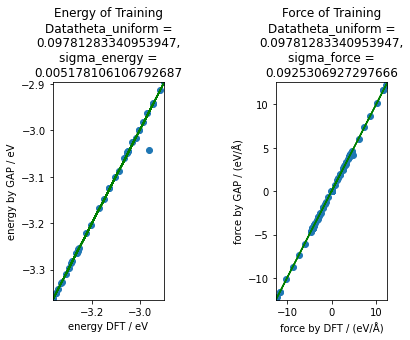

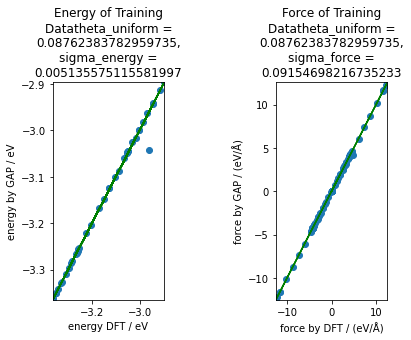

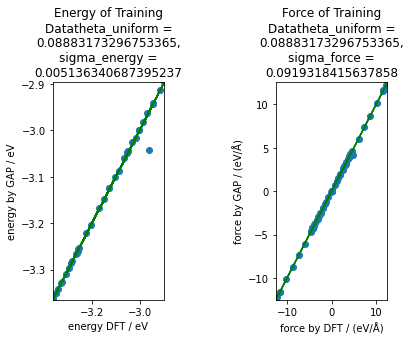

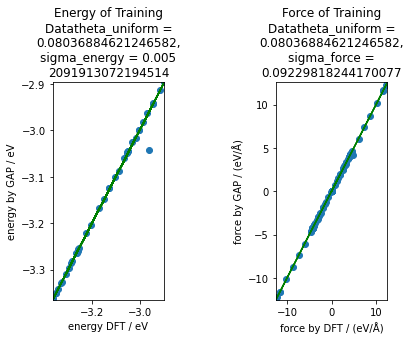

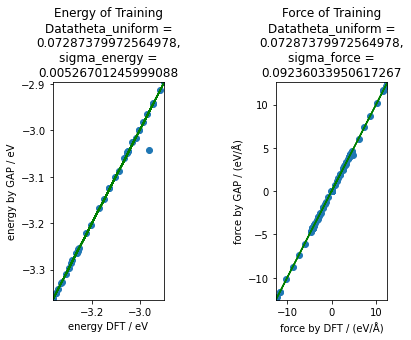

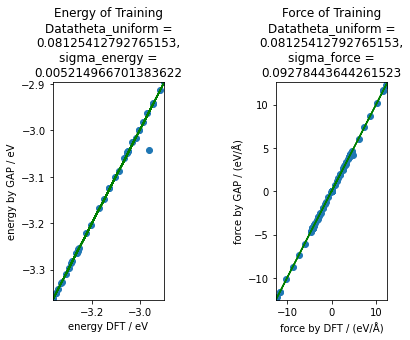

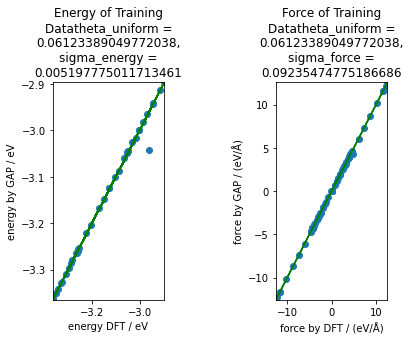

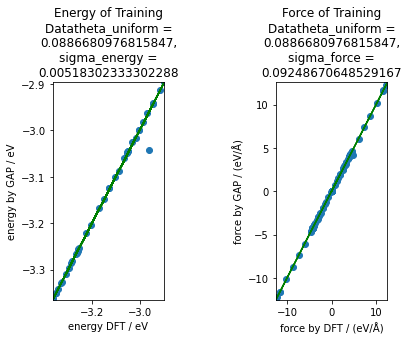

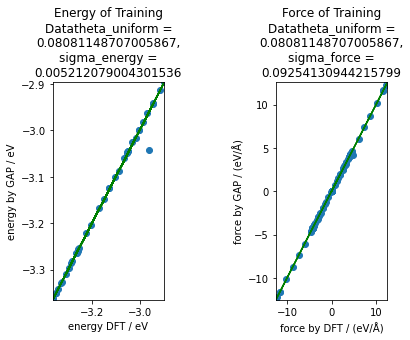

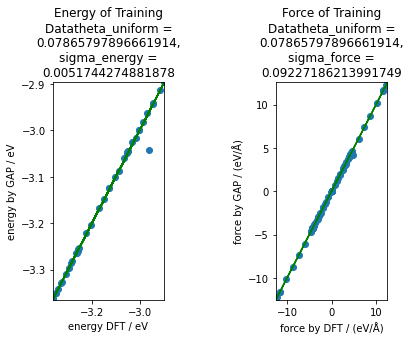

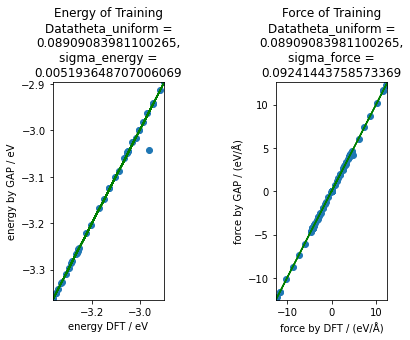

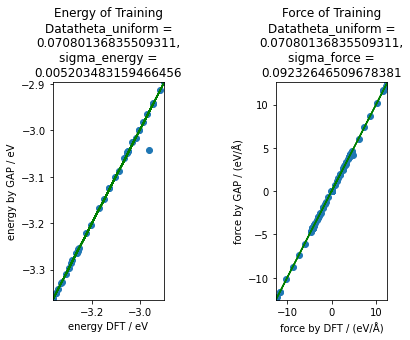

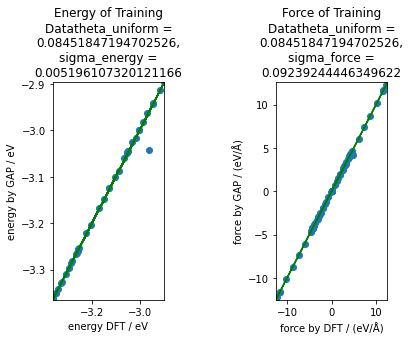

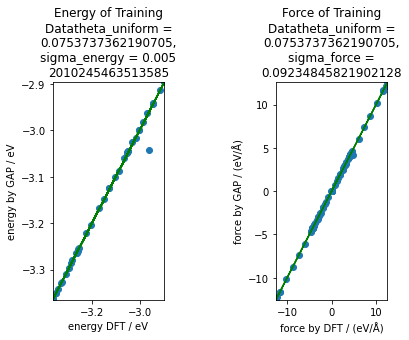

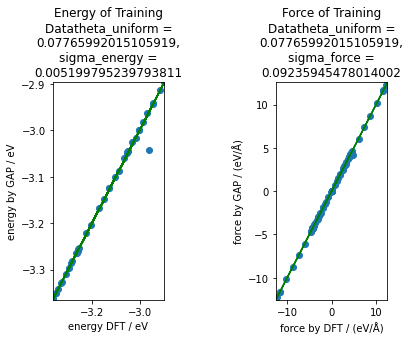

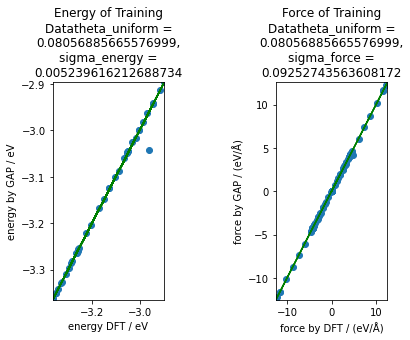

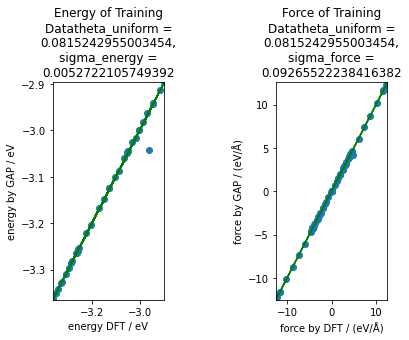

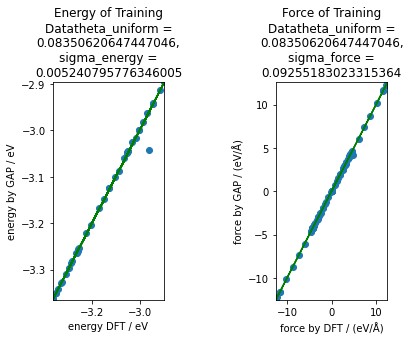

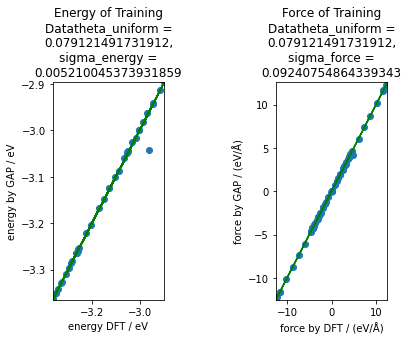

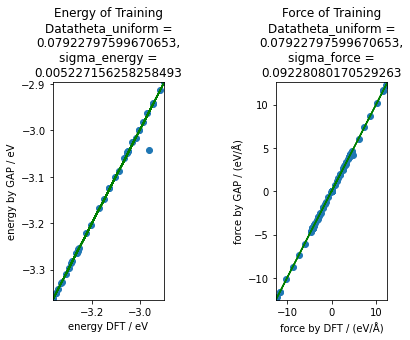

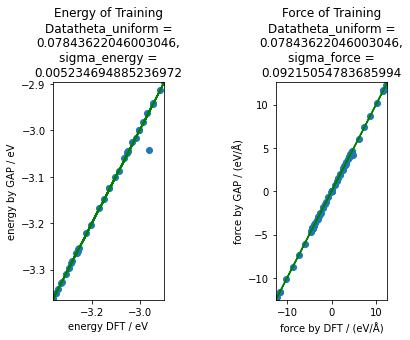

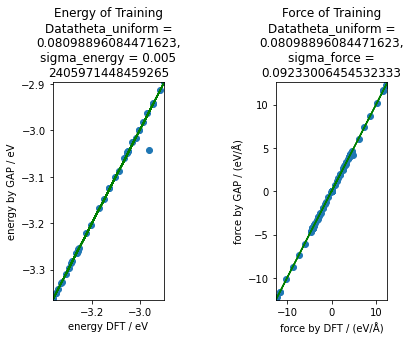

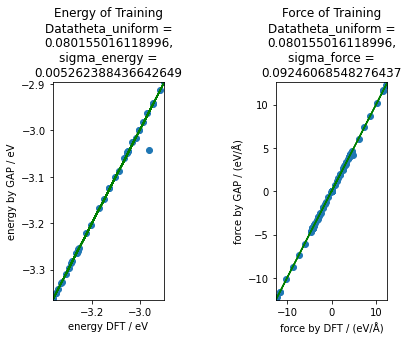

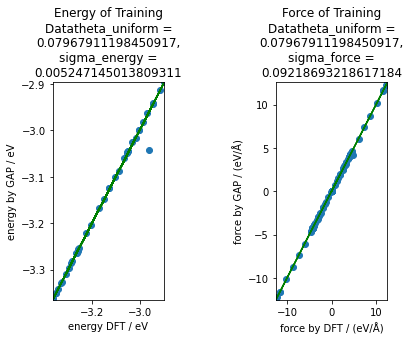

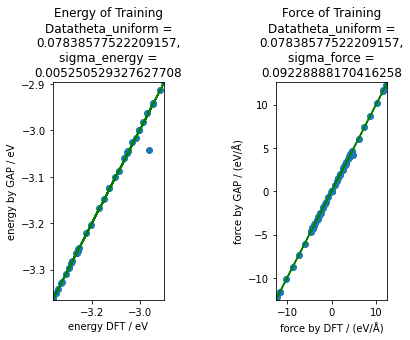

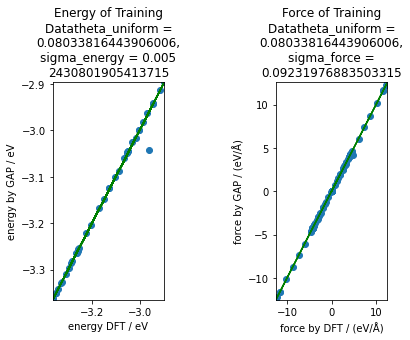

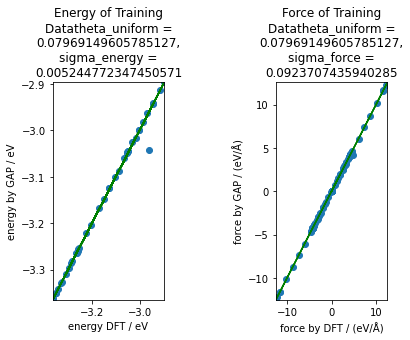

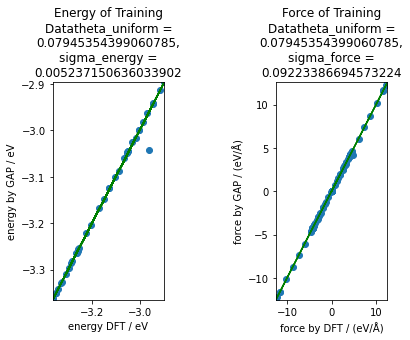

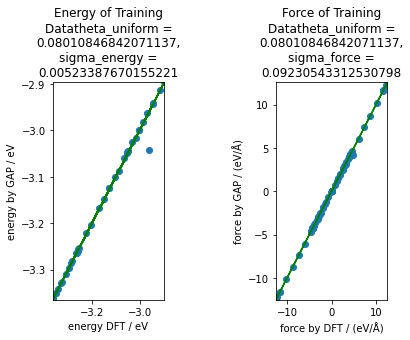

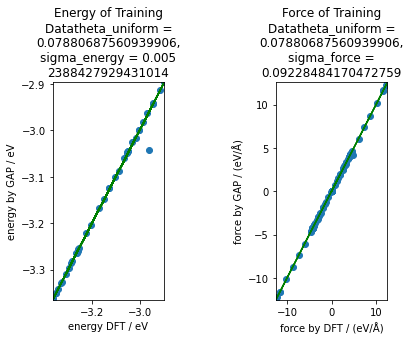

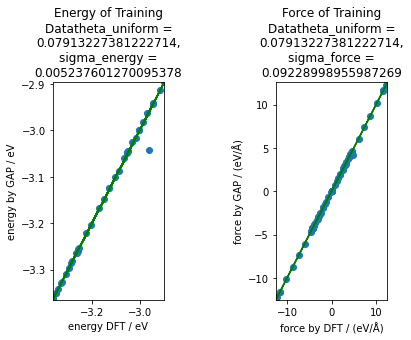

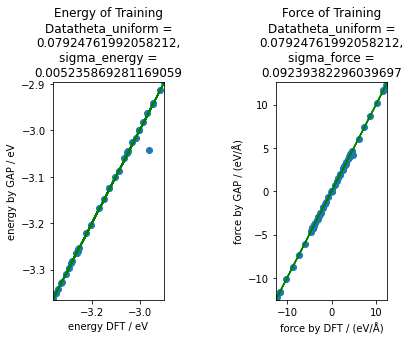

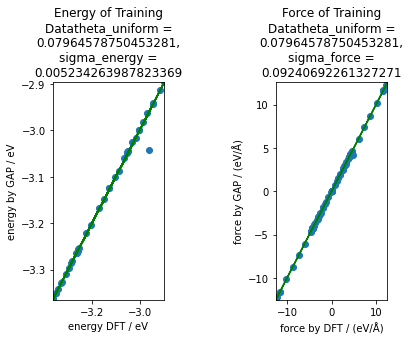

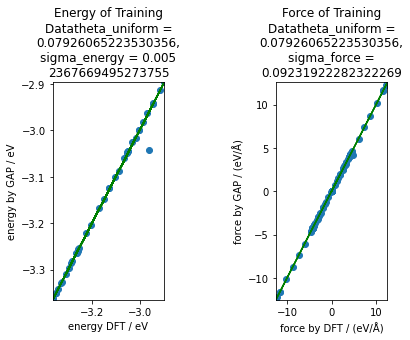

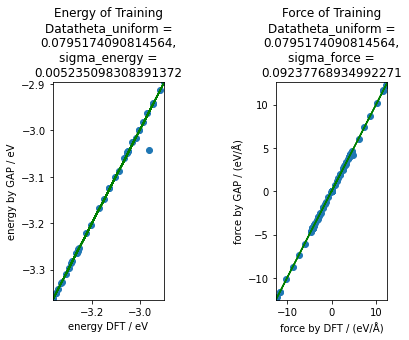

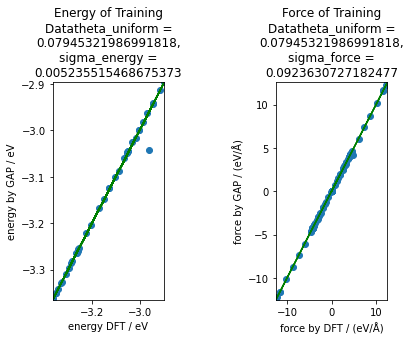

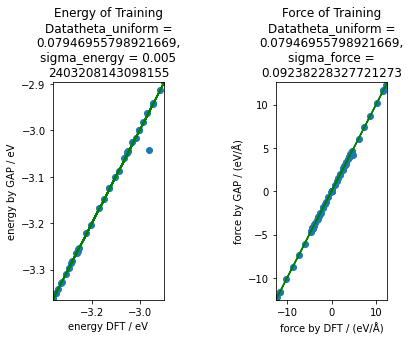

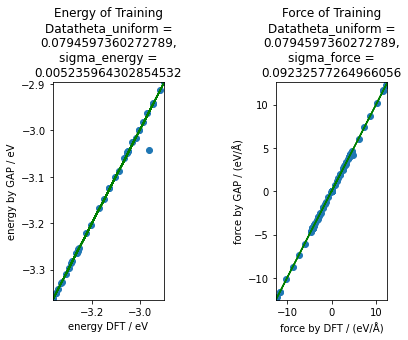

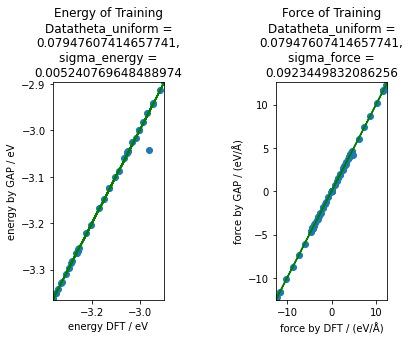

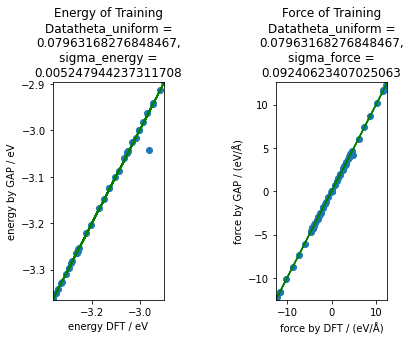

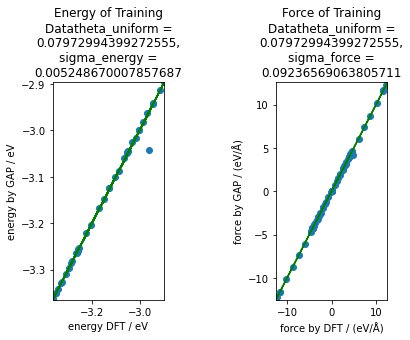

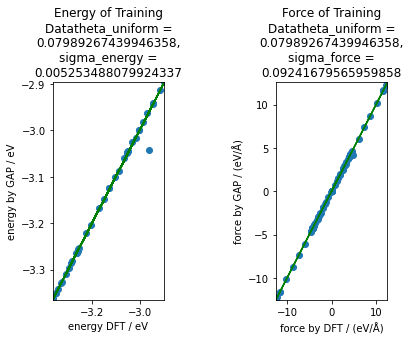

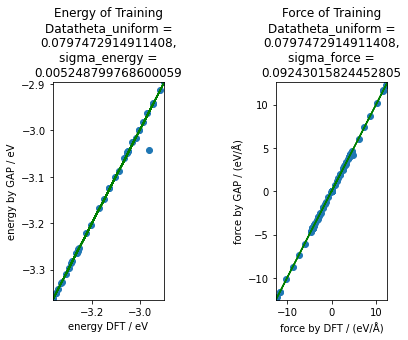

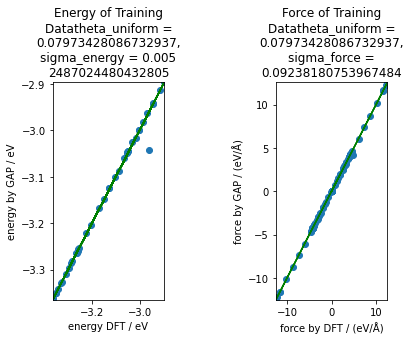

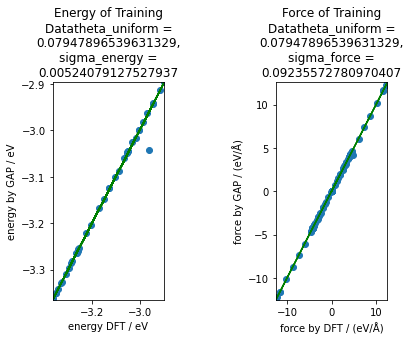

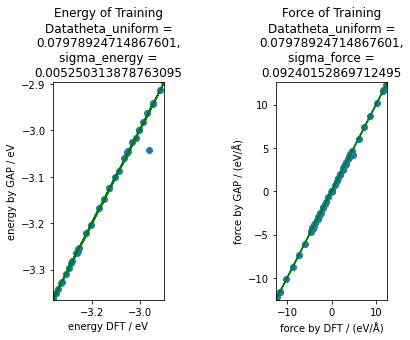

In [6]:
import scipy.optimize
initial_guess = [1,0.004,0.08]
result = scipy.optimize.minimize(RMSE_train,initial_guess,method='Nelder-Mead',
                                 options={'fatol':10e-5,'maxiter':100,'disp':True})


In [7]:
result

 final_simplex: (array([[0.0796915 , 0.00524477, 0.09237074],
       [0.07963168, 0.00524794, 0.09240623],
       [0.07973428, 0.0052487 , 0.09238181],
       [0.07978925, 0.00525031, 0.09240153]]), array([0.01800864, 0.01800962, 0.01801241, 0.01801247]))
           fun: 0.01800864420924675
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 45
        status: 0
       success: True
             x: array([0.0796915 , 0.00524477, 0.09237074])

## Minimize RMSE, add up RMSE for training and validation data

In [8]:
data_file = 'train.xyz'
validation_file = 'test.xyz'
def RMSE_train_val(tef):
    theta,sigma_energy,sigma_force = tef[0],tef[1],tef[2]
    data_file = 'train.xyz'
    validation_file = 'test.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 4
    n_sparse = 20
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

    # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=False)

    # Select filename in which predictions should be stored for prediction data
    prediction_file_tr= f"quip_2btrain.xyz"
    prediction_file_val= f"quip_2bvalidate.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file_tr,print_output=False)
    
    # Predict energies on validation data
    model.predict(Test_Data=validation_file, GAP_potential=potential, QUIP_Prediction=prediction_file_val,print_output=False)
    
    
    # Calculate RMSE of error
    rmse_energy_train = model.energy_RMSE(data_file,prediction_file_tr)
    rmse_force_train = model.force_RMSE(data_file,prediction_file_tr) 
    rmse_energy_validate = model.energy_RMSE(validation_file,prediction_file_val)
    rmse_force_validate = model.force_RMSE(validation_file,prediction_file_val)
    RMSE = rmse_energy_train/2 + rmse_force_train/6 + rmse_energy_validate/2 + rmse_force_validate/6
    

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file_tr, 
                            axis=axs[0,0],
                            title="\n".join(wrap(f"Energy of Training Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file_tr, 
                        axis=axs[0,1],
                        title="\n".join(wrap(f"Force of Training Data "
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    
    plot.energies_on_energies(real_values=validation_file, predicted_values=prediction_file_val, 
                            axis=axs[1,0],
                            title="\n".join(wrap(f"Energy of Validation Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=validation_file, predicted_values=prediction_file_val, 
                        axis=axs[1,1],
                        title="\n".join(wrap(f"Force of Validation Data "
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    # Get real and predicted energies
    #real_energies, predicted_energies = model.getEnergies('train.xyz','quip_2b.xyz')
    
    return RMSE

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.05 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.95 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8999999999999999 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.9333333333333333 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_ty

<ipython-input-8-5301cf1b8d23>:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.0023319615912186648 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.050342935528122815 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = -0.012139917695475344 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07407407407407218 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07716049382715867 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2611111111111097 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.19279835390946343 sparse

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3271879741886137 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3494561366780303 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.40194624574417404 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.27344071854195345 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2324187064499723 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.32019677912101585 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.30031434636528354 sparse_method 

 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3256049837848791 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.32567880772562247 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.32570856417048394 sparse_method = UNIFORM add_species = T n_sparse = 20
 distance_2b cutoff = 4 covariance_type = ARD_SE delta = 1 theta_uniform = 0.3256116908977059 sparse_method = UNIFORM add_species = T n_sparse = 20
Optimization terminated successfully.
         Current function value: 0.020887
         Iterations: 67
         Function evaluations: 137


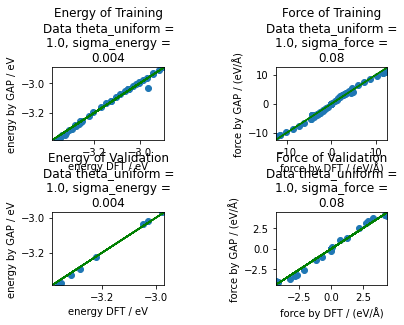

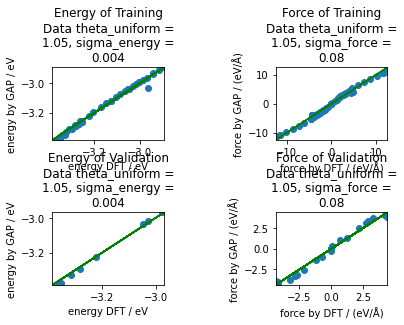

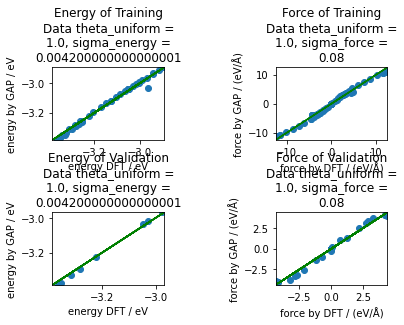

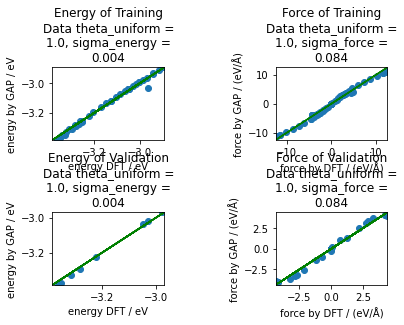

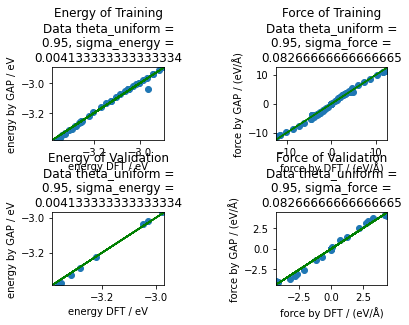

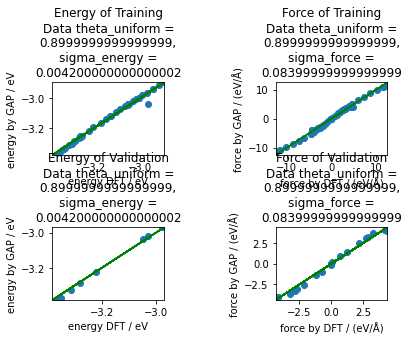

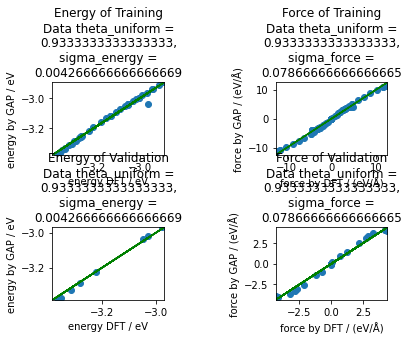

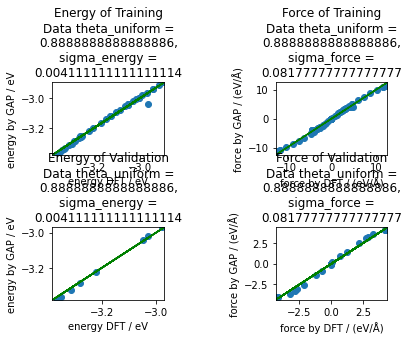

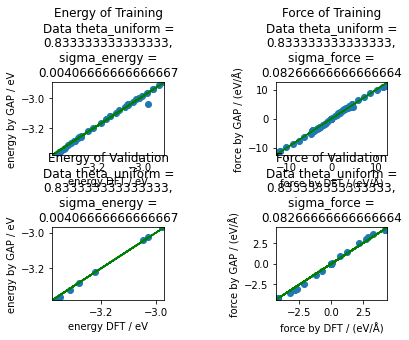

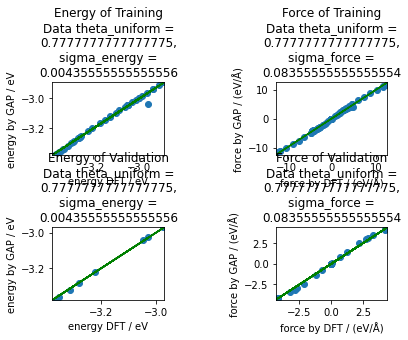

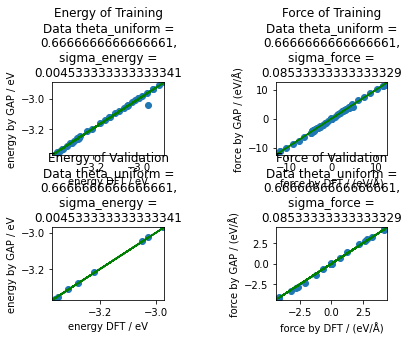

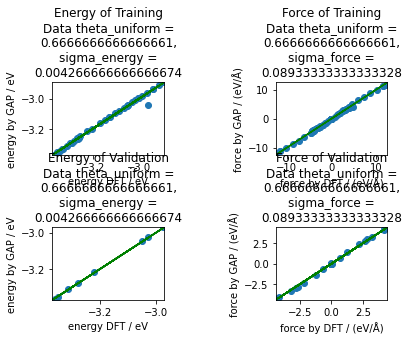

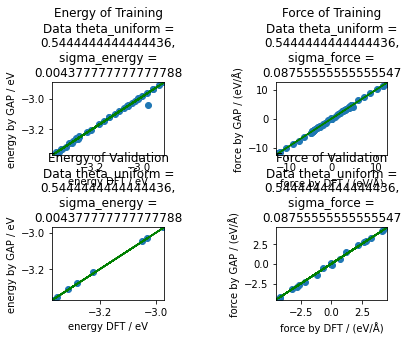

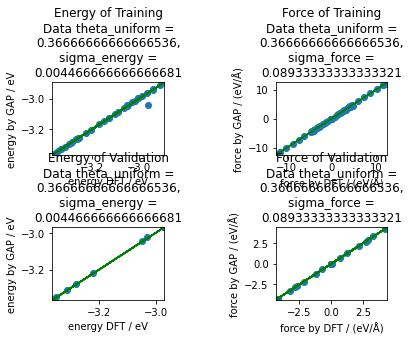

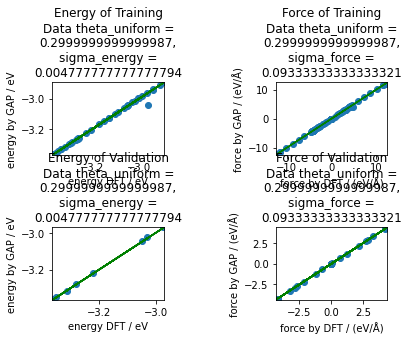

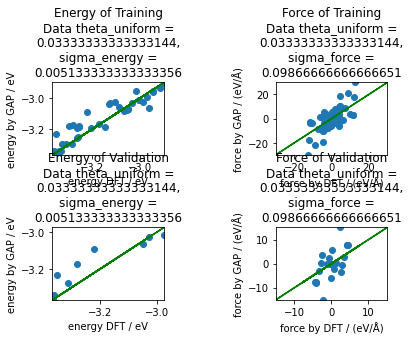

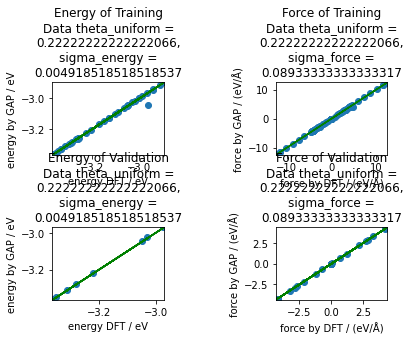

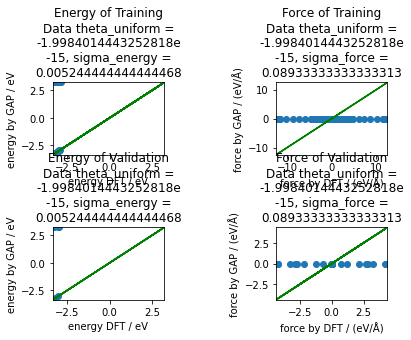

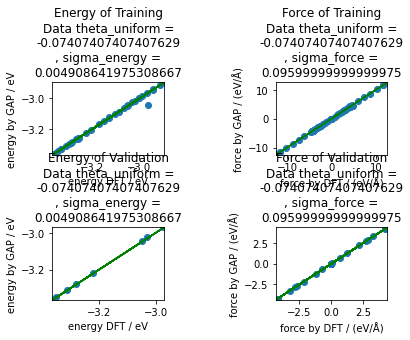

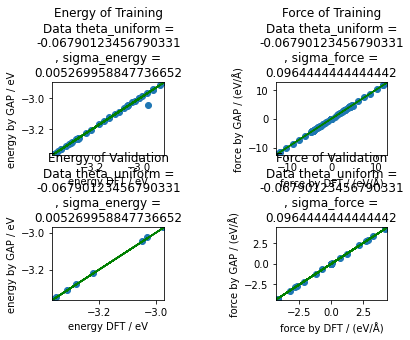

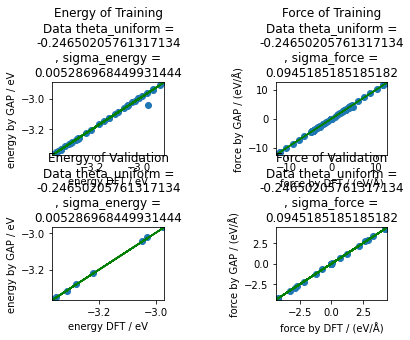

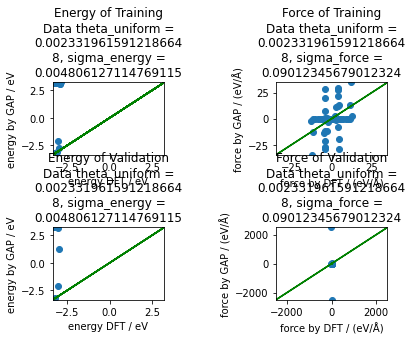

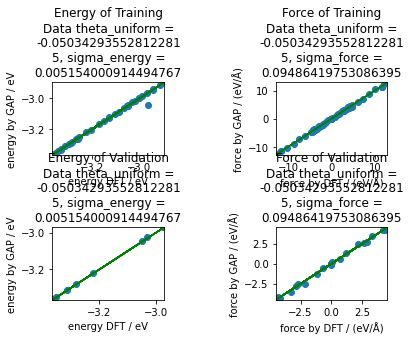

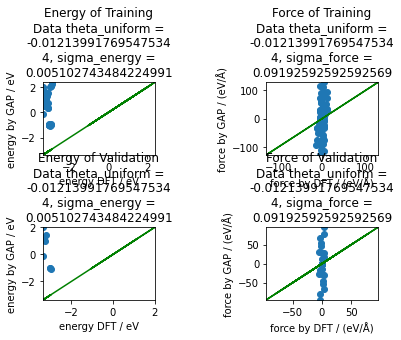

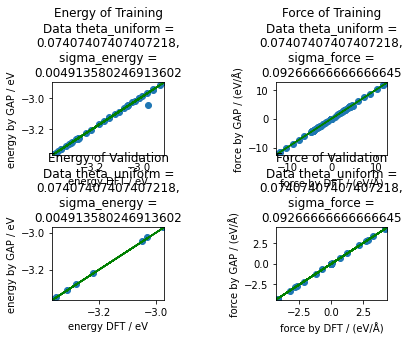

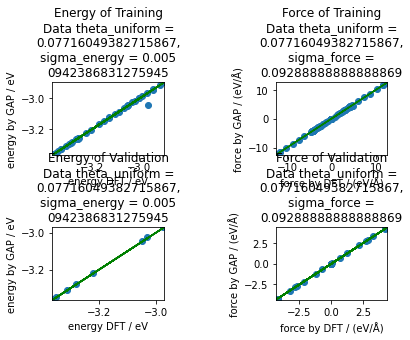

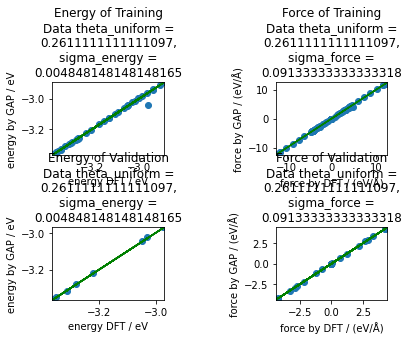

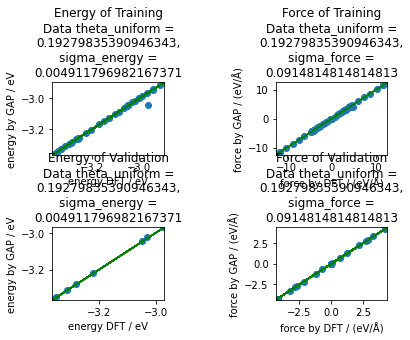

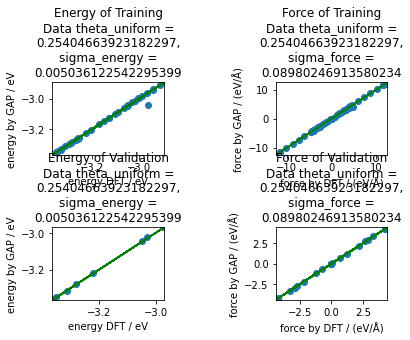

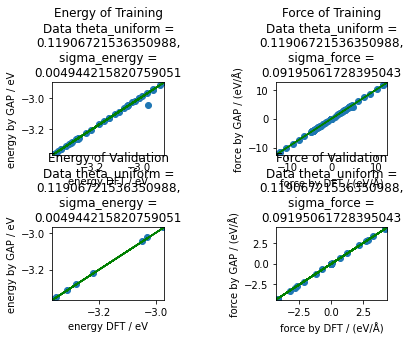

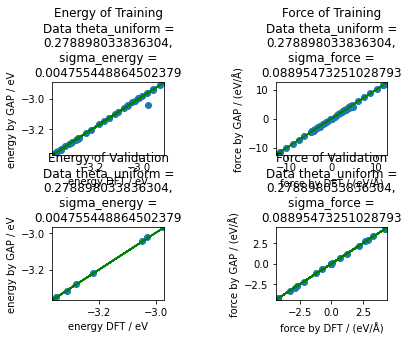

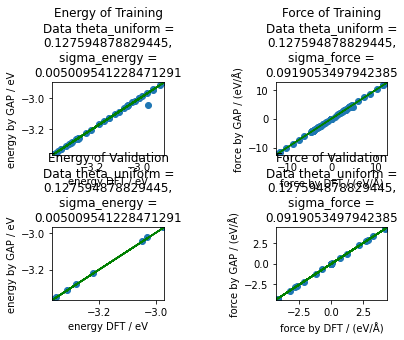

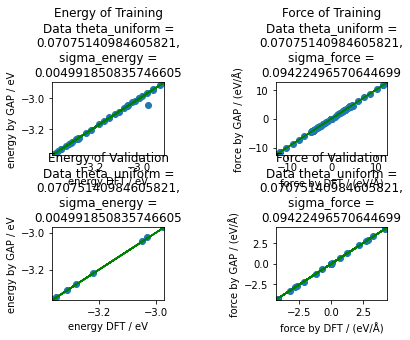

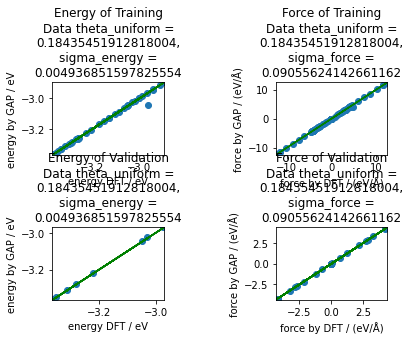

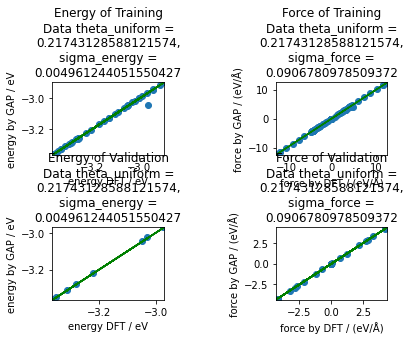

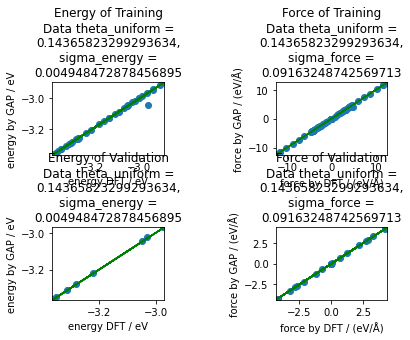

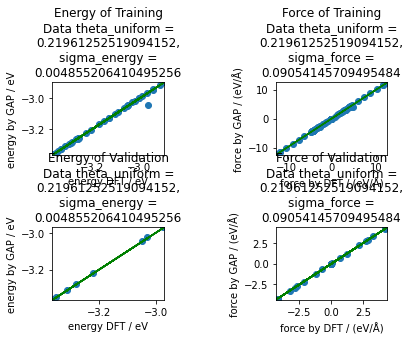

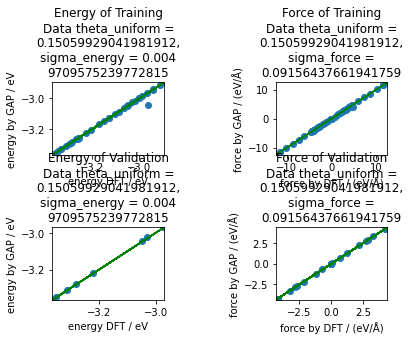

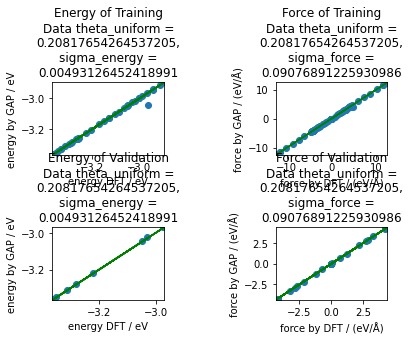

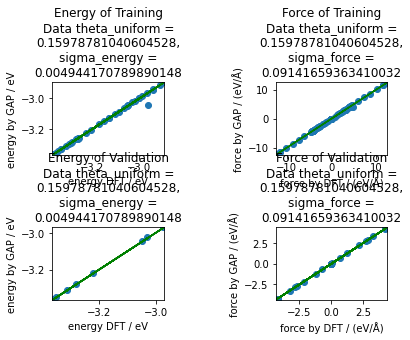

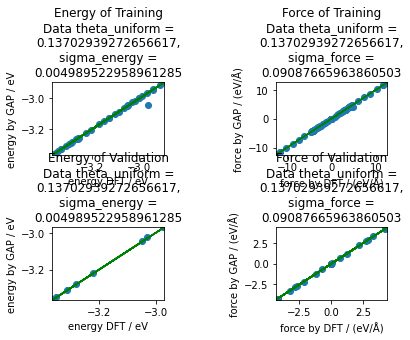

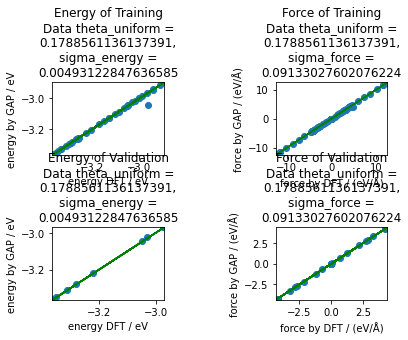

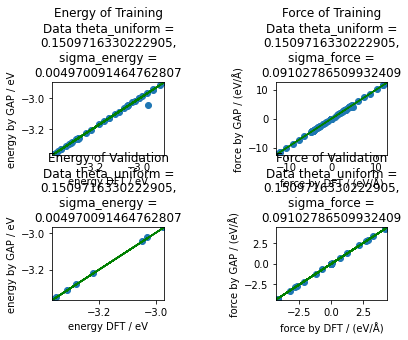

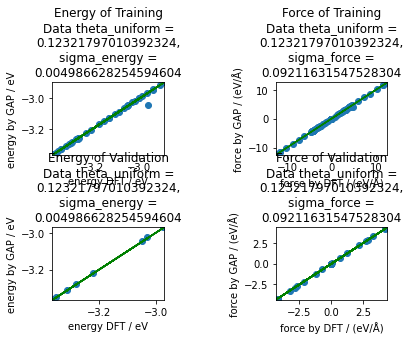

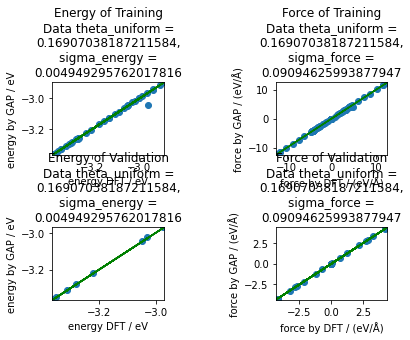

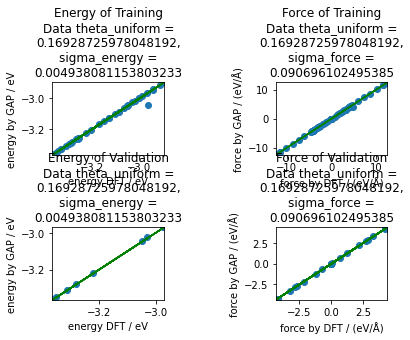

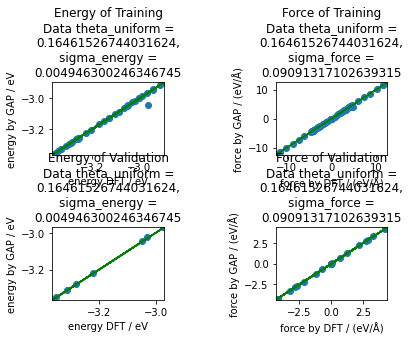

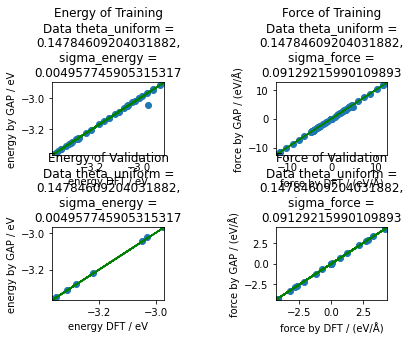

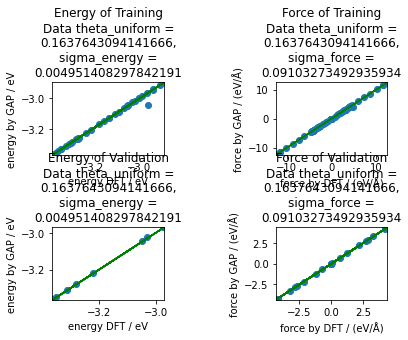

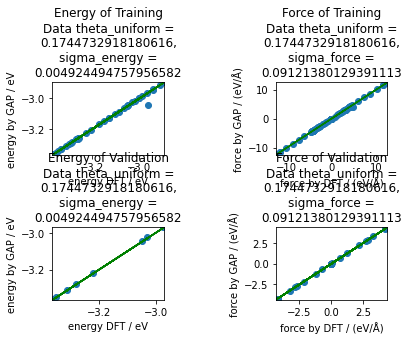

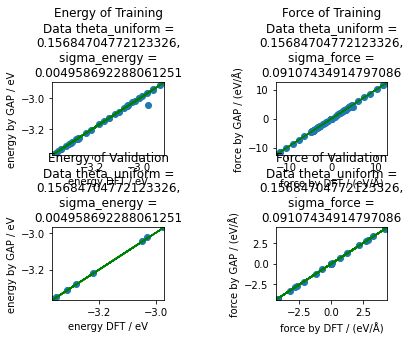

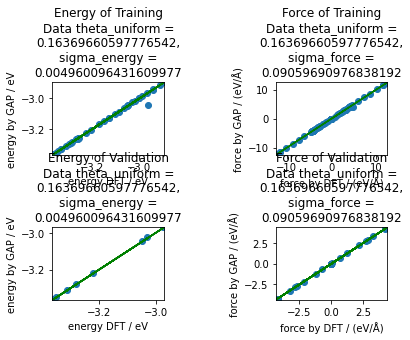

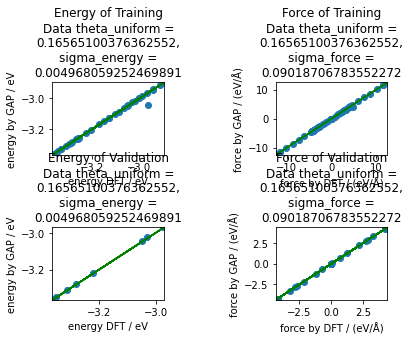

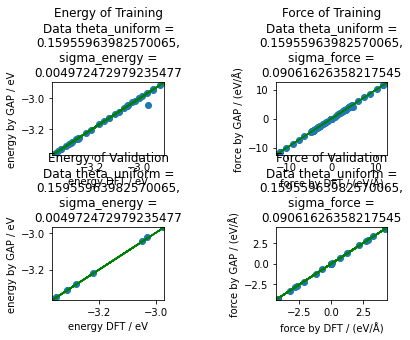

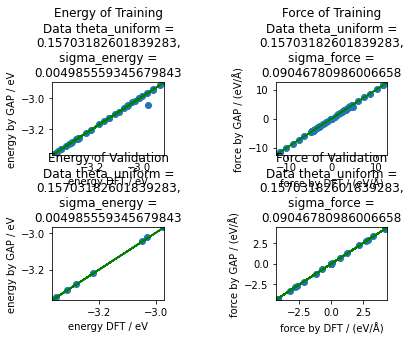

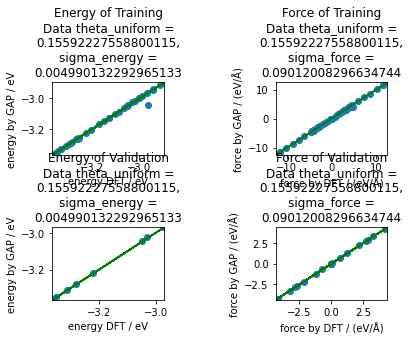

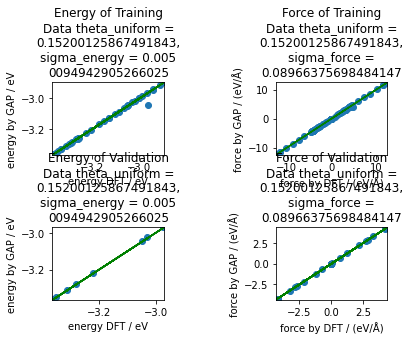

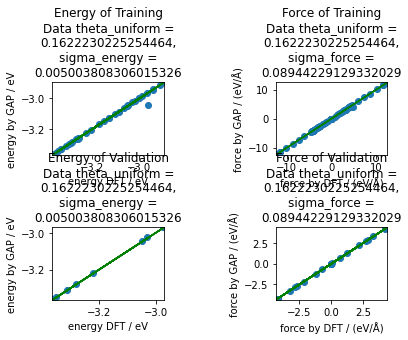

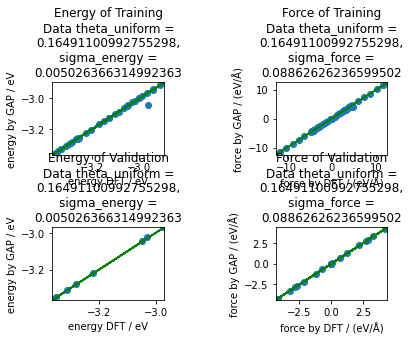

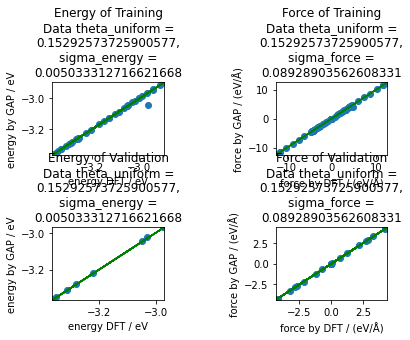

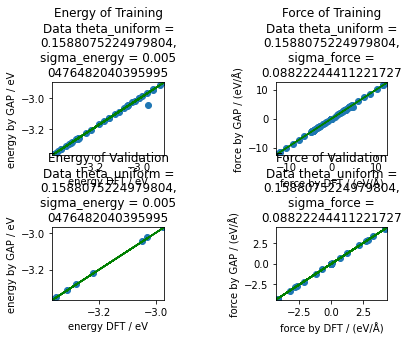

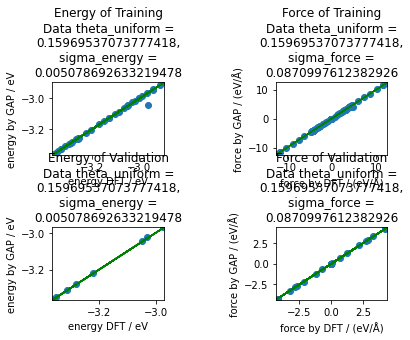

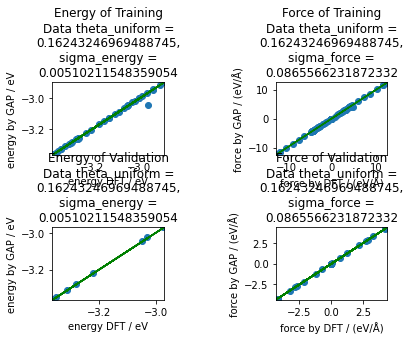

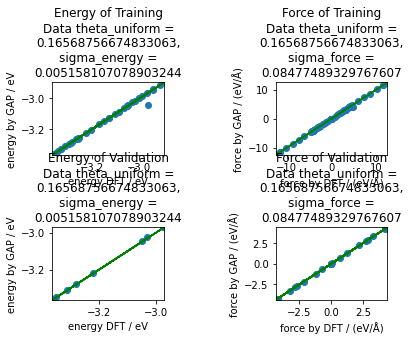

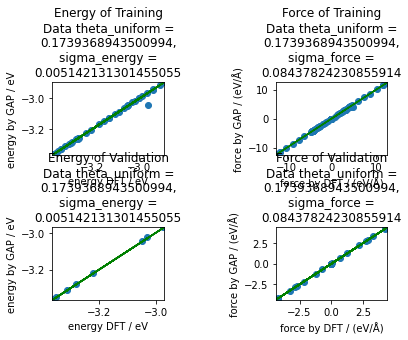

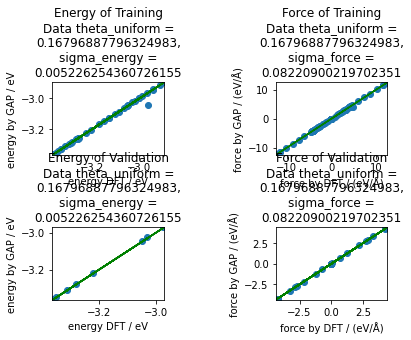

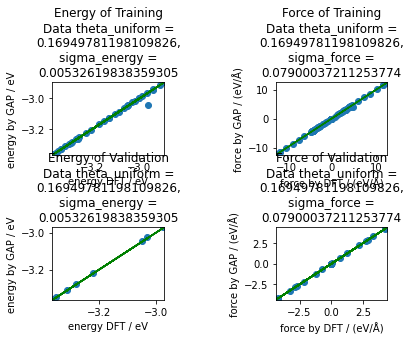

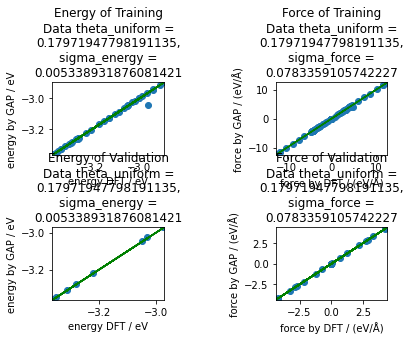

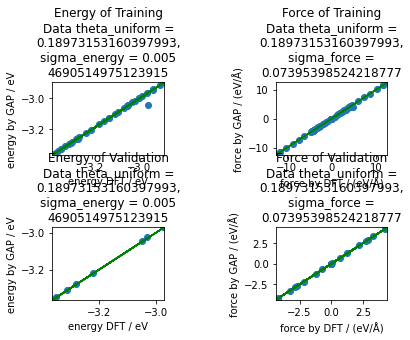

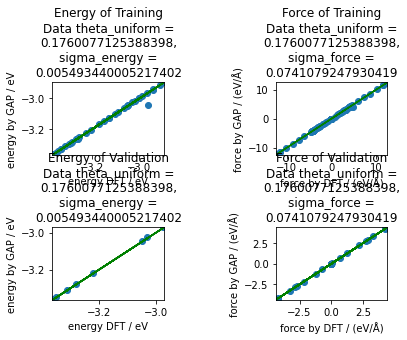

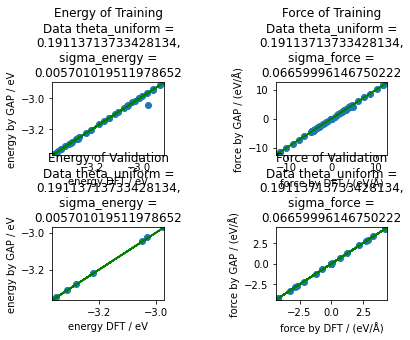

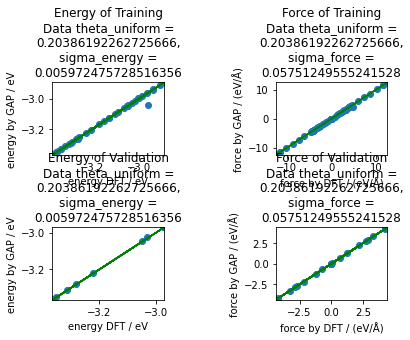

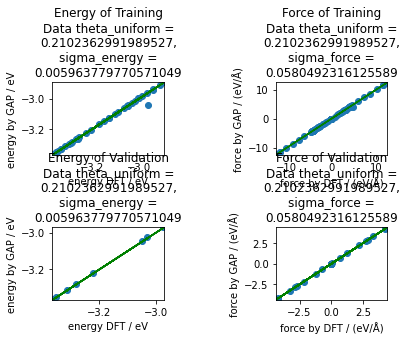

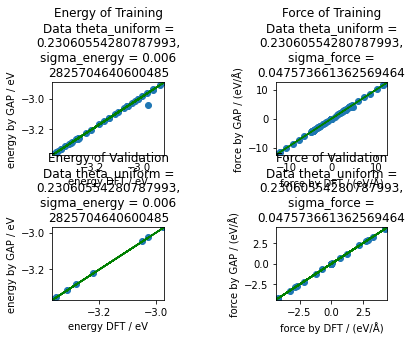

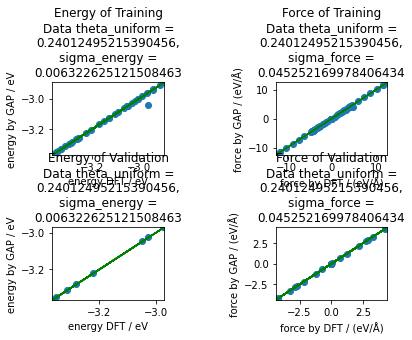

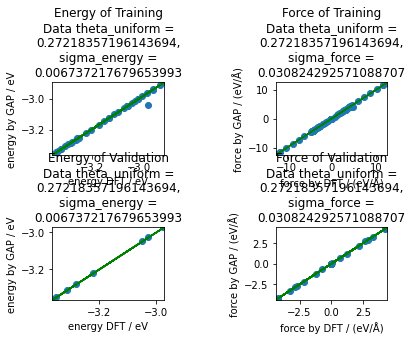

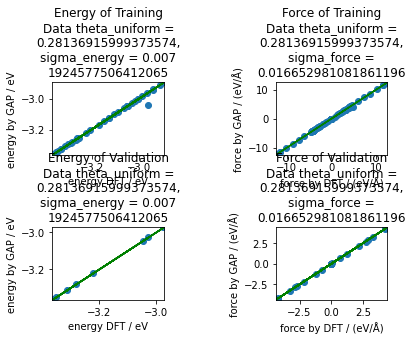

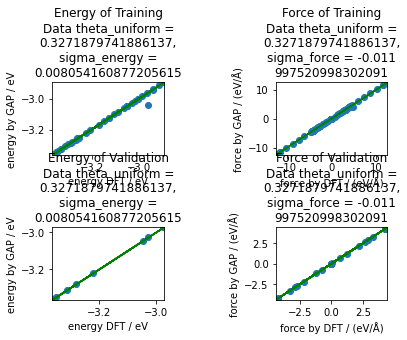

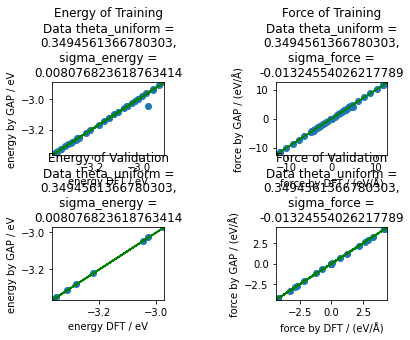

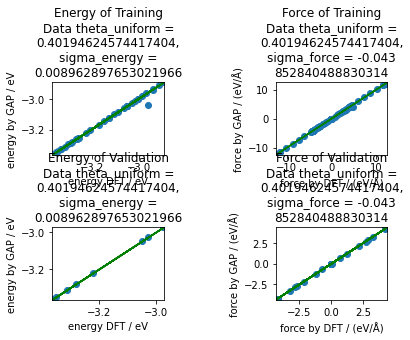

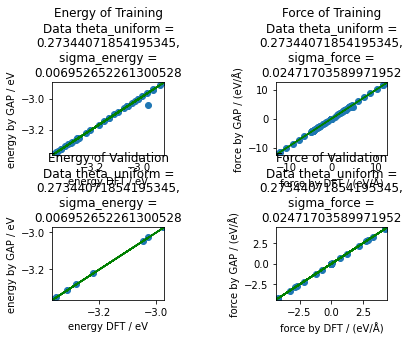

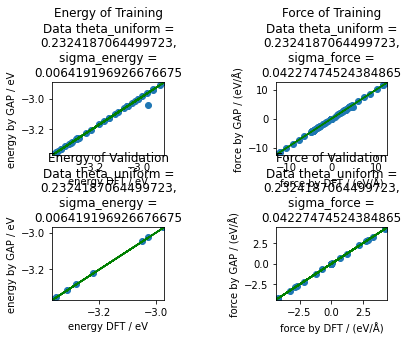

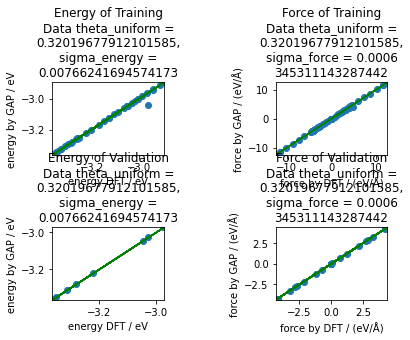

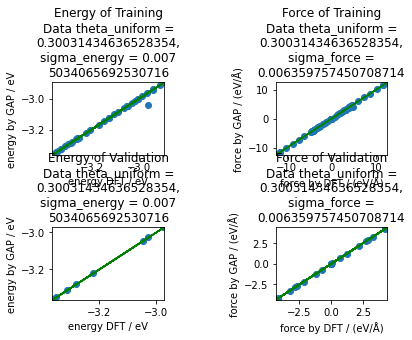

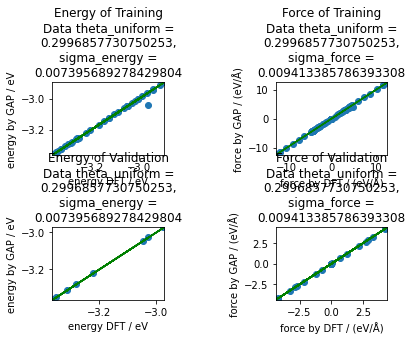

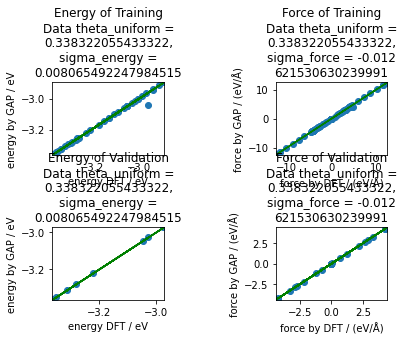

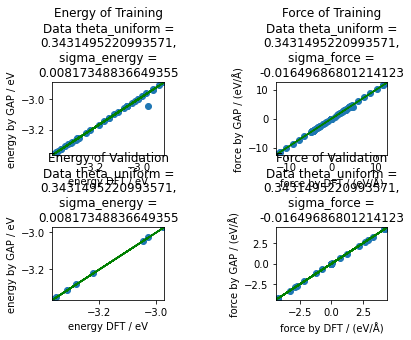

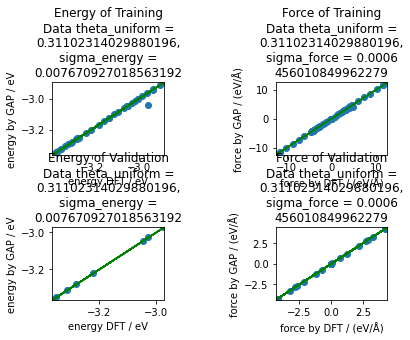

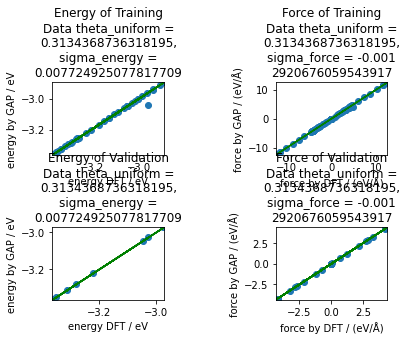

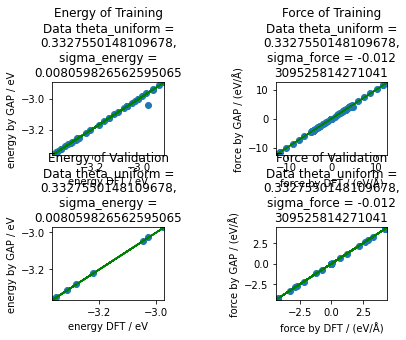

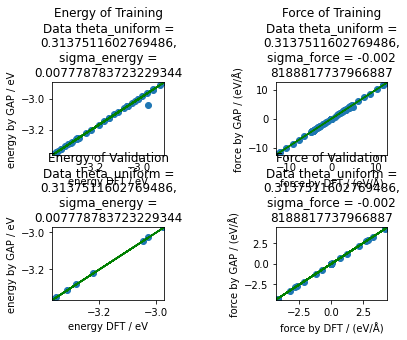

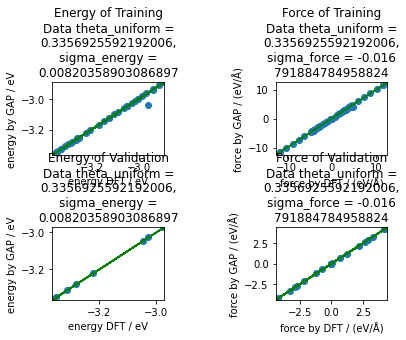

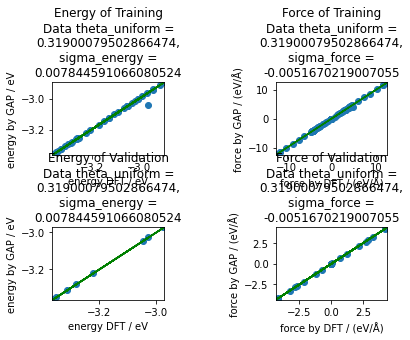

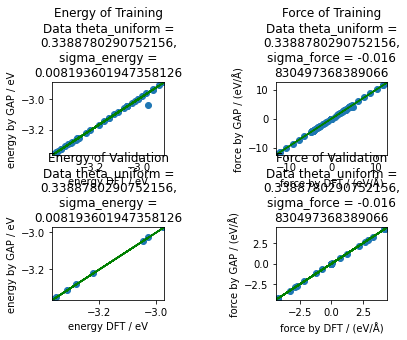

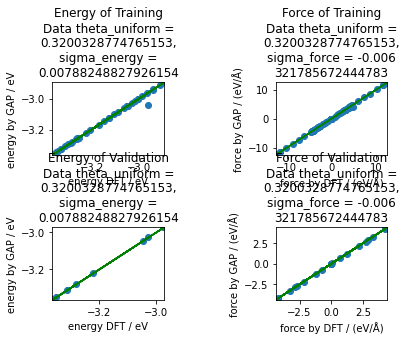

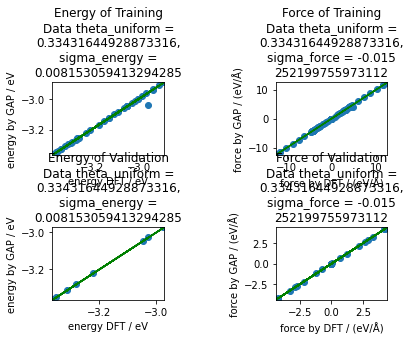

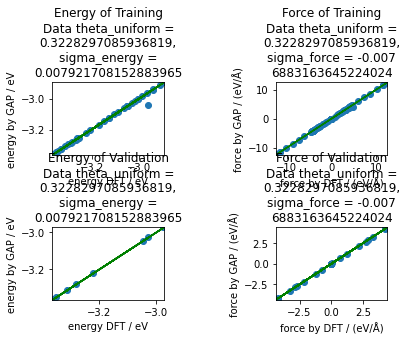

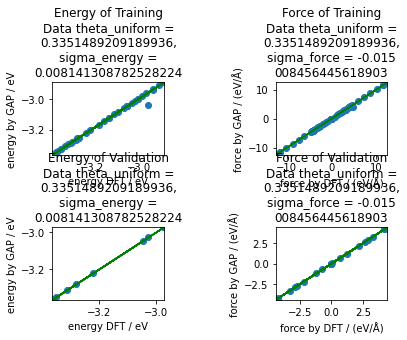

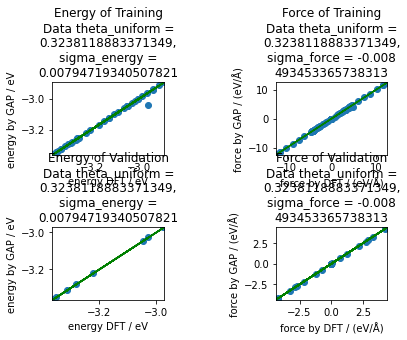

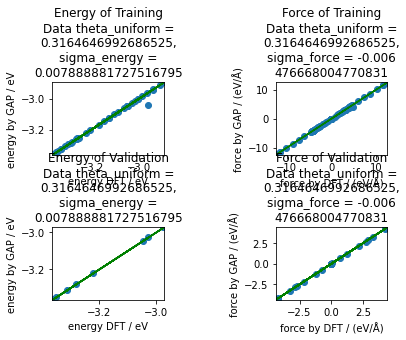

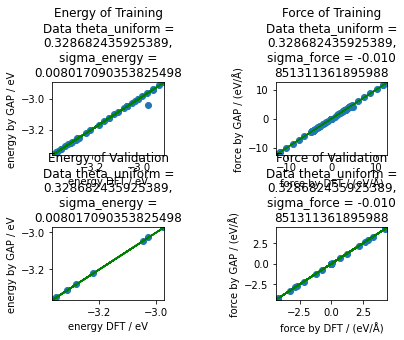

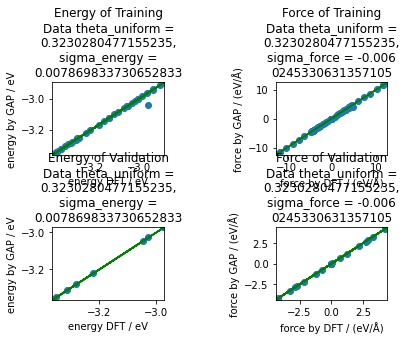

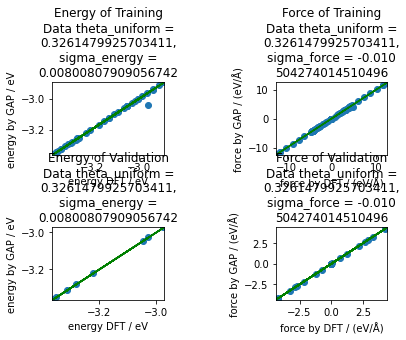

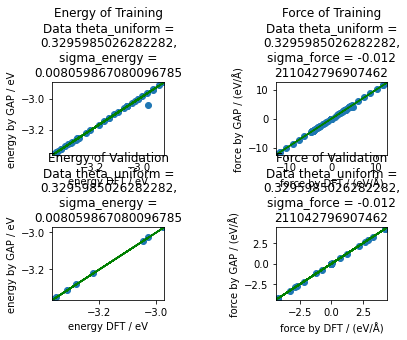

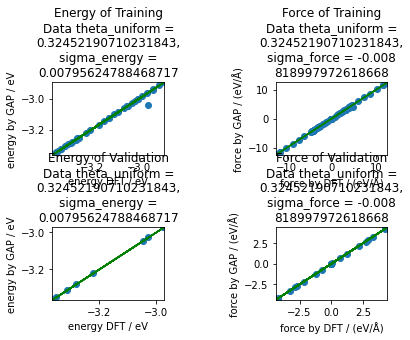

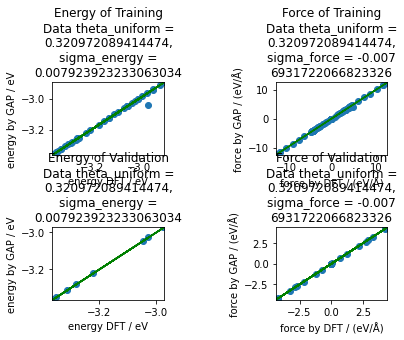

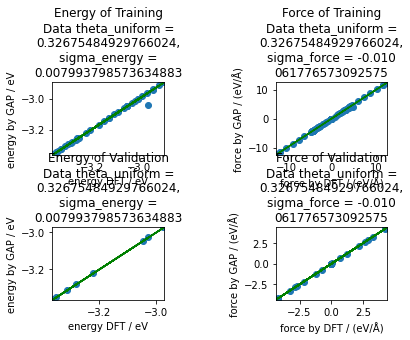

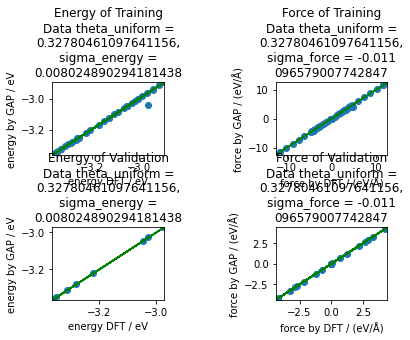

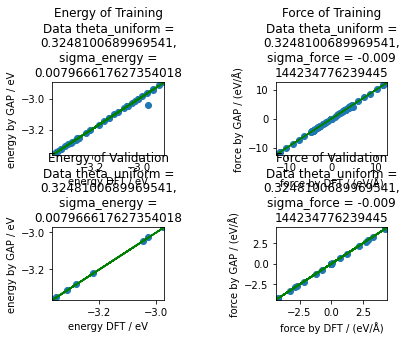

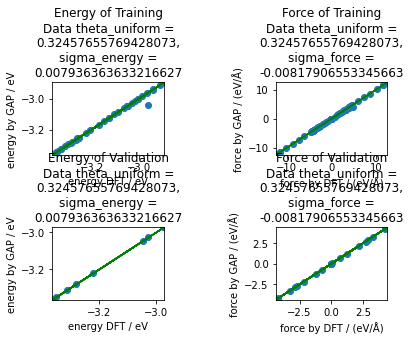

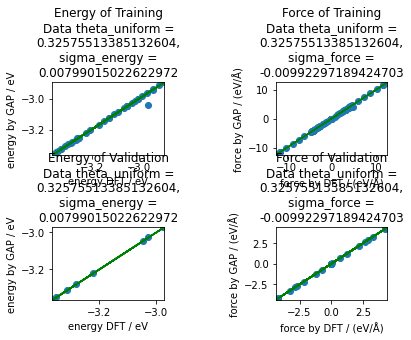

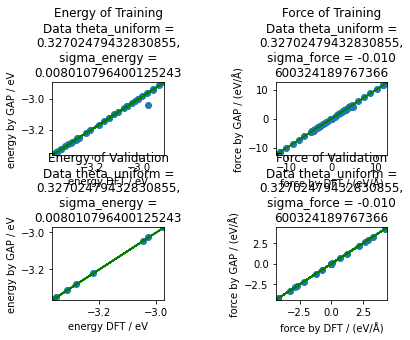

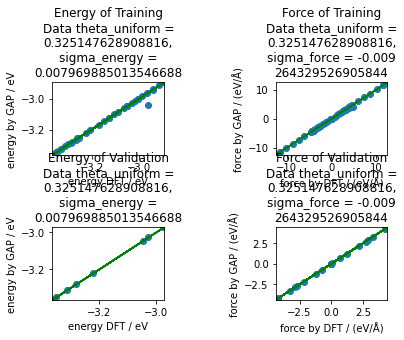

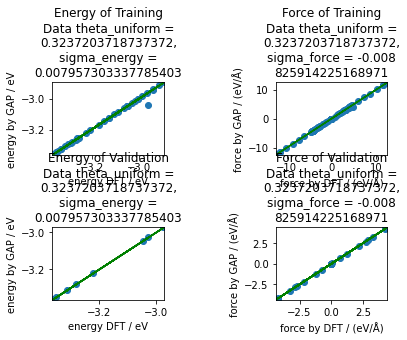

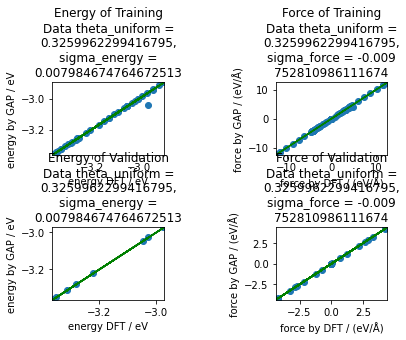

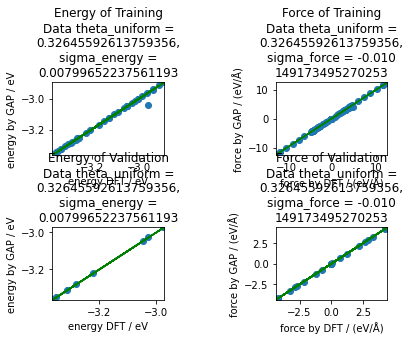

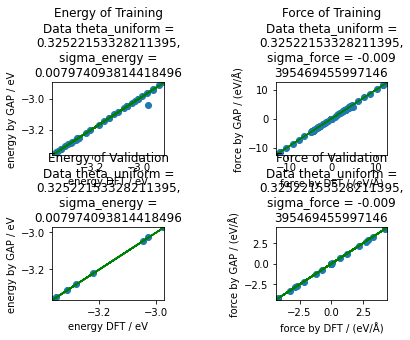

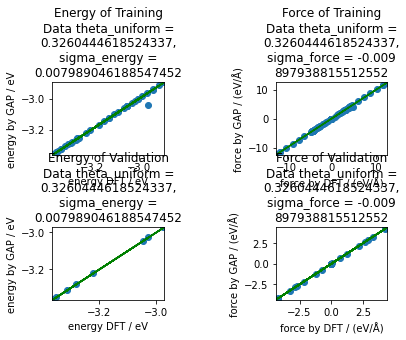

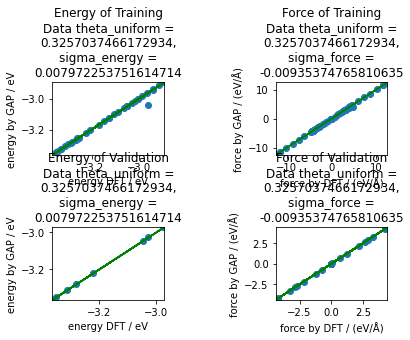

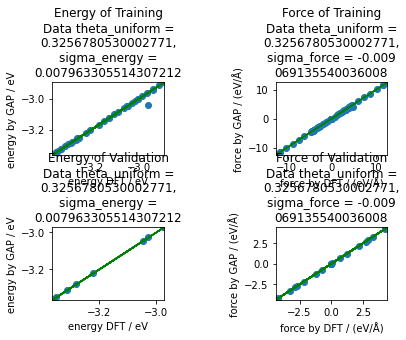

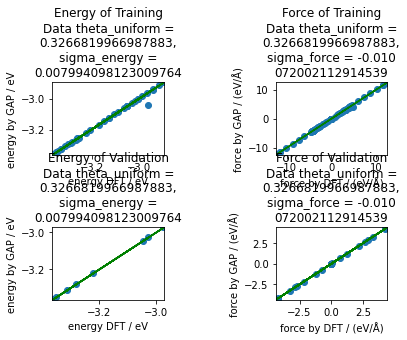

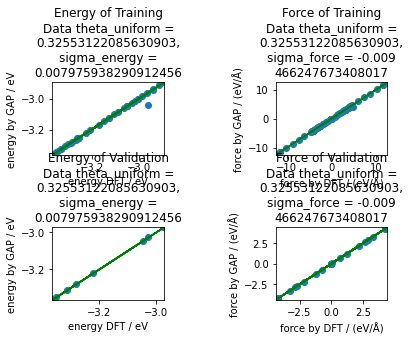

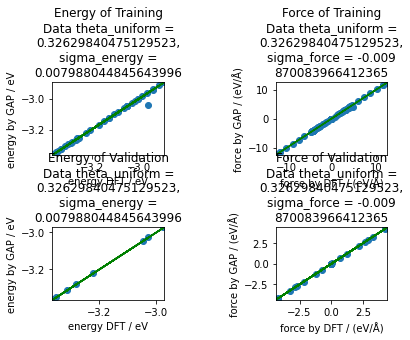

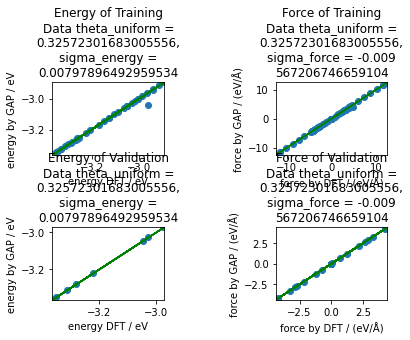

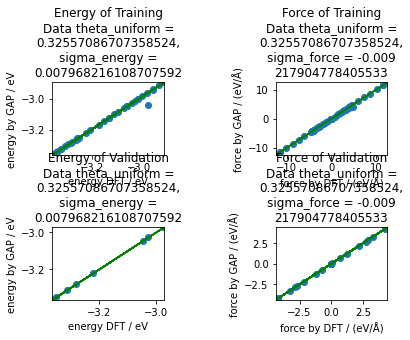

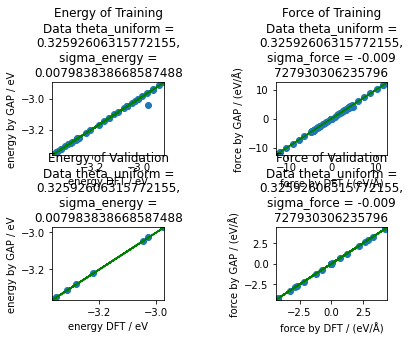

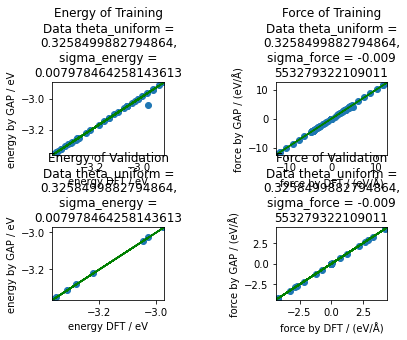

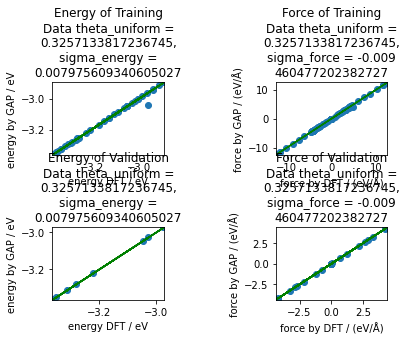

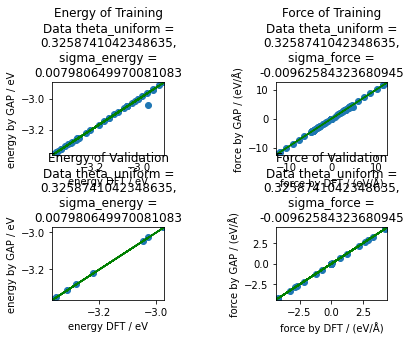

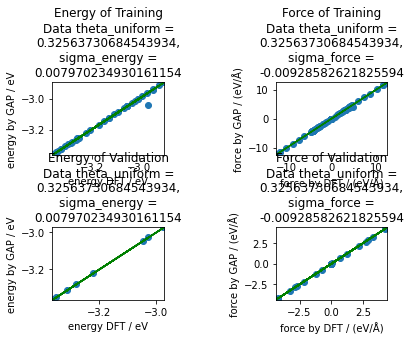

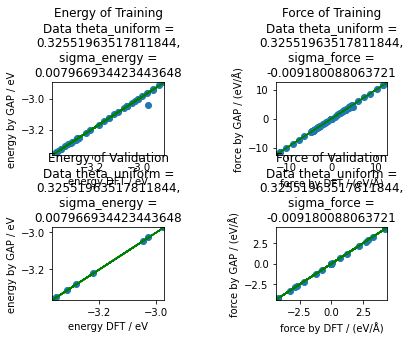

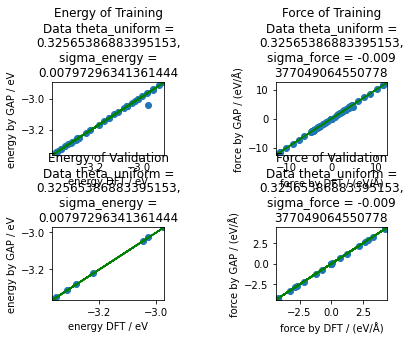

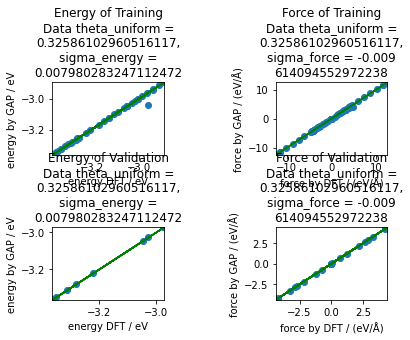

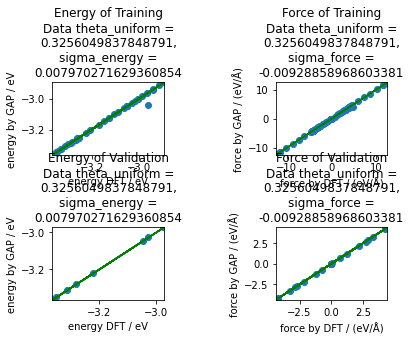

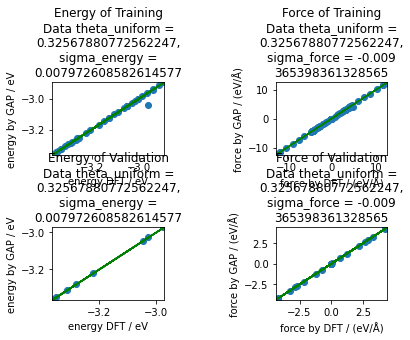

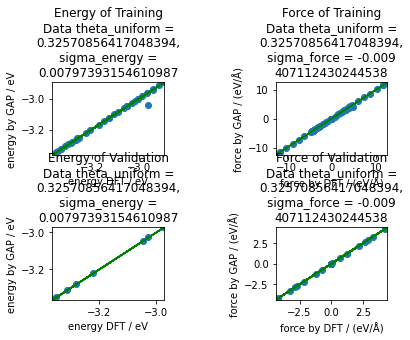

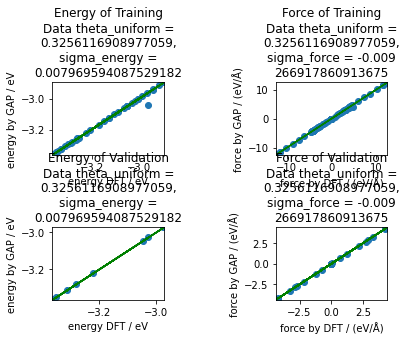

In [9]:
import scipy.optimize
initial_guess = [1,0.004,0.08]
result = scipy.optimize.minimize(RMSE_train_val,initial_guess,method='Nelder-Mead',
                                 options={'fatol':10e-5,'maxiter':100,'disp':True})

In [10]:
result

 final_simplex: (array([[ 0.32570375,  0.00797225, -0.00935375],
       [ 0.32561169,  0.00796959, -0.00926692],
       [ 0.32567881,  0.00797261, -0.0093654 ],
       [ 0.32570856,  0.00797393, -0.00940711]]), array([0.02088701, 0.02088916, 0.0208902 , 0.02089051]))
           fun: 0.02088701255104128
       message: 'Optimization terminated successfully.'
          nfev: 137
           nit: 67
        status: 0
       success: True
             x: array([ 0.32570375,  0.00797225, -0.00935375])